<h1 style="background-color:#FF45D7; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Metadata
</h1>

<h2 style="background-color:#E6A3D6; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Customer Data Base
</h2>

- *carID* - An attribute that contains an identifier for each car;
- *Brand* -  The car’s main brand (e.g. Ford, Toyota);
- *model* -  The car model;
- *year* -  The year of Registration of the Car;
- *mileage* - The total reported distance travelled by the car (inmiles);
- *tax* - The amount of road tax (in £) that, in 2020, wasapplicable to the car in question;
- *fuelType* - Type of Fuel used by the car (Diesel, Petrol, Hybrid,Electric);
- *mpg* - Average Miles per Gallon;
- *engineSize* - Size of Engine in liters (Cubic Decimeters);
- *paintQuality%* - The mechanic’s assessment of the cars’ overall paintquality and hull integrity (filled by the mechanicduring evaluation);
- *previousOwners* - Number of previous registered owners of the vehicle.
- *hasDamage* - Boolean marker filled by the seller at the time ofregistration stating whether the car is damaged or not;
- *price* The car’s price when purchased by Cars 4 You (in £);




In [1067]:
#general imports that we will need will almost always use - it is a good practice to import all libraries at the beginning of the notebook or script
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import lasso_path


# embedded methods
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.calibration import LabelEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures


from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import RidgeCV, ElasticNetCV, HuberRegressor
from sklearn.compose import TransformedTargetRegressor


#set random seed for reproducibility
RSEED = 42
np.random.seed(RSEED)


In [1068]:
# path to folder
df_train = pd.read_csv("project_data/train.csv", delimiter=',', header=0, decimal='.', quotechar='"')

In [1069]:
#divinding into X and y, as well as validation set and training set
X_test = pd.read_csv("project_data/test.csv", delimiter=',', header=0, decimal='.', quotechar='"')
# setting 'carID' as index
df_train.set_index('carID', inplace = True)
X_test.set_index('carID', inplace = True)


<h2 style="background-color:#E6A3D6; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
1. Data Pre-processing and Cleaning
</h2>

<h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
.shape, .head() and .tail() visualizations
</h3>

In [1070]:
df_train.shape, X_test.shape

((75973, 13), (32567, 12))

In [1071]:
df_train.head() #Checking the first rows of the dataset df_train

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [1072]:
X_test.head() #Checking the first rows of the dataset X_test

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0,0.0
106581,VW,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
80886,BMW,2 Series,2016.000000,Automatic,36792.000000,Petrol,125.0,51.4,1.5,94.0,2.0,0.0
100174,Opel,Grandland X,2019.000000,Manual,5533.000000,Petrol,145.0,44.1,1.2,77.0,1.0,0.0
81376,BMW,1 Series,2019.000000,Semi-Auto,9058.000000,Diesel,150.0,51.4,2.0,45.0,4.0,0.0


In [1073]:
df_train.tail() #Checking the last rows of the dataset df_train

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
37194,Mercedes,C Class,2015.0,13498,Manual,14480.0,etrol,125.0,53.3,2.0,78.0,0.0,0.0
6265,Audi,Q3,2013.0,12495,Semi-Auto,52134.0,Diesel,200.0,47.9,2.0,38.0,2.0,0.0
54886,Toyota,Aygo,2017.0,8399,Automatic,11304.0,Petrol,145.0,67.0,1.0,57.0,3.0,0.0
860,Audi,Q3,2015.0,12990,Manual,69072.0,iesel,125.0,60.1,2.0,74.0,2.0,0.0
15795,Ford,Fiesta,2018.0,10495,Manual,16709.0,Petro,145.0,64.2,1.1,38.0,1.0,0.0


In [1074]:
X_test.tail() #Checking the last rows of the dataset X_test

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
105775,VW,Tiguan,2017.0,Manual,27575.00000,Petrol,145.0,46.3,1.4,94.0,1.0,0.0
81363,BMW,X2,2020.0,Automatic,1980.00000,Petrol,145.0,34.0,2.0,39.0,3.0,0.0
76833,Audi,Q5,2019.0,Semi-Auto,8297.00000,Diesel,145.0,38.2,2.0,88.0,4.0,0.0
91768,Mercedes,A Class,2019.0,Manual,-50755.21023,Petrol,145.0,28.5,1.3,81.0,1.0,0.0
99627,Toyota,Yaris,2017.0,Automatic,11071.00000,Petrol,30.0,58.0,1.3,98.0,4.0,0.0


In [1075]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75973 entries, 69512 to 15795
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           74452 non-null  object 
 1   model           74456 non-null  object 
 2   year            74482 non-null  float64
 3   price           75973 non-null  int64  
 4   transmission    74451 non-null  object 
 5   mileage         74510 non-null  float64
 6   fuelType        74462 non-null  object 
 7   tax             68069 non-null  float64
 8   mpg             68047 non-null  float64
 9   engineSize      74457 non-null  float64
 10  paintQuality%   74449 non-null  float64
 11  previousOwners  74423 non-null  float64
 12  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 8.1+ MB


 <h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
 Data types, duplicate/missing/unique values, typecasting, feature stats
</h3>

### **Data Types and Typecasting**

In [1076]:
df_train.dtypes #Checking the datatypes of each feature in the dataset df_train

Brand              object
model              object
year              float64
price               int64
transmission       object
mileage           float64
fuelType           object
tax               float64
mpg               float64
engineSize        float64
paintQuality%     float64
previousOwners    float64
hasDamage         float64
dtype: object

'year' should be a datetime object. 'previousOwnwers' is also portrayed on the wrong data type, as it should be an Integer. The remainder seem to be correctly assigned

In [1077]:
#correcting the data types
df_train['year']=pd.to_datetime(df_train['year'], format='%Y')
df_train["year"] = df_train["year"].dt.year
X_test['year']=pd.to_datetime(X_test['year'], format='%Y')
X_test["year"] = X_test["year"].dt.year

#previousOwnwers to integer will be done later on the pre-processing step

### **Missing Values**

In [1078]:
df_train.replace("", np.nan, inplace=True) #Replacing empty strings with NaN values
df_train.isna().sum() #Checking the number of missing values in each feature of the dataset X

Brand             1521
model             1517
year              1491
price                0
transmission      1522
mileage           1463
fuelType          1511
tax               7904
mpg               7926
engineSize        1516
paintQuality%     1524
previousOwners    1550
hasDamage         1548
dtype: int64

In [1079]:
X_test.replace("", np.nan, inplace=True) #Replacing empty strings with NaN values
X_test.isna().sum() #Checking the number of missing values in each feature of the

Brand              649
model              650
year               653
transmission       623
mileage            689
fuelType           656
tax               3308
mpg               3288
engineSize         628
paintQuality%      625
previousOwners     597
hasDamage          597
dtype: int64

<span style="color:red">The missing values on all features have to be handled!</span>


### **Duplicated Values**

In [1080]:

print("\nDuplicated values:", df_train.duplicated().sum())


Duplicated values: 4


The training set has 11 duplicated lines. Its' presence is insignificant, therefore we can drop them.

In [1081]:
df_train = df_train.drop_duplicates()
print("\nDuplicated values:", df_train.duplicated().sum())


Duplicated values: 0


In [1082]:
print("\nDuplicated values:", X_test.duplicated().sum())



Duplicated values: 0


### **Numerical Variables Statistics**

In [1083]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
year,74478.0,2017.091785,2.211158,1970.000000,2016.0,2017.0,2019.0,2024.000000
price,75969.0,16882.001922,9737.075658,450.000000,10200.0,14699.0,20950.0,159999.000000
mileage,74507.0,23004.761128,22130.041696,-58540.574478,7423.5,17301.0,32428.0,323000.000000
tax,68067.0,120.328500,65.522046,-91.121630,125.0,145.0,145.0,580.000000
mpg,68045.0,55.152286,16.497834,-43.421768,46.3,54.3,62.8,470.800000
engineSize,74453.0,1.660161,0.573464,-0.103493,1.2,1.6,2.0,6.600000
paintQuality%,74445.0,64.591773,21.020975,1.638913,47.0,65.0,82.0,125.594308
previousOwners,74419.0,1.994485,1.472961,-2.345650,1.0,2.0,3.0,6.258371
hasDamage,74421.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


### **Categorical Features Unique Values**

Checking if all the unique values of the categorical features are appropriate.

In [1084]:
for var in df_train.columns:
    if df_train[var].dtype == 'object':
        print(f"{var} unique values: {df_train[var].unique()} \n")

Brand unique values: ['VW' 'Toyota' 'Audi' 'Ford' 'BMW' 'Skoda' 'Opel' 'Mercedes' 'FOR'
 'mercedes' 'Hyundai' 'w' 'ord' 'MW' 'bmw' nan 'yundai' 'BM' 'Toyot' 'udi'
 'Ope' 'AUDI' 'V' 'opel' 'pel' 'For' 'pe' 'Mercede' 'audi' 'MERCEDES'
 'OPEL' 'koda' 'FORD' 'Hyunda' 'W' 'Aud' 'vw' 'hyundai' 'skoda' 'ford'
 'TOYOTA' 'ercedes' 'oyota' 'toyota' 'SKODA' 'Skod' 'HYUNDAI' 'kod' 'v'
 'for' 'SKOD' 'aud' 'KODA' 'PEL' 'yunda' 'or' 'UDI' 'OYOTA' 'HYUNDA' 'mw'
 'OPE' 'mercede' 'ERCEDES' 'ercede' 'TOYOT' 'MERCEDE' 'ORD' 'ud' 'ope'
 'AUD' 'hyunda' 'skod' 'toyot'] 

model unique values: [' Golf' ' Yaris' ' Q2' ' FIESTA' ' 2 Series' '3 Series' ' A3' ' Octavia'
 ' Passat' ' Focus' ' Insignia' ' A Clas' ' Q3' ' Fabia' ' A Class' ' Ka+'
 ' 3 Series' ' GLC Class' ' I30' ' C Class' ' Polo' ' E Class' ' C Clas'
 ' Q5' ' Up' ' Fiesta' ' C-HR' ' Mokka X' ' Corsa' ' Astra' ' TT'
 ' 5 Series' ' Aygo' ' 4 Series' ' SLK' ' Viva' ' T-Roc' 'Focus'
 ' EcoSport' ' Tucson' ' EcoSpor' nan ' X-CLASS' ' CL Class' ' IX20'
 '

We observe that there are typos present on all categorical variables. We have to get them fixed in order to understand the data better and clear out inconsistencies.


In [1085]:
for var in X_test.columns:
    if X_test[var].dtype == 'object':
        print(f"{var} unique values: {X_test[var].unique()} \n")

Brand unique values: ['Hyundai' 'VW' 'BMW' 'Opel' 'Ford' 'Mercedes' 'Skoda' 'Toyot' 'Toyota'
 'Audi' nan 'For' 'Ope' 'toyota' 'vw' 'hyundai' 'MW' 'SKODA' 'ord' 'udi'
 'bmw' 'V' 'BM' 'HYUNDAI' 'OPEL' 'mercedes' 'audi' 'Mercede' 'pel' 'opel'
 'FORD' 'yundai' 'ford' 'Aud' 'oyota' 'MERCEDES' 'ercedes' 'AUDI' 'koda'
 'Hyunda' 'W' 'skoda' 'Skod' 'ercede' 'TOYOTA' 'ERCEDES' 'kod' 'ORD' 'v'
 'ud' 'M' 'FOR' 'for' 'MERCEDE' 'YUNDAI' 'PEL' 'ope' 'or' 'TOYOT' 'hyunda'
 'oyot' 'UDI' 'mw' 'pe' 'bm'] 

model unique values: [' I30' ' Tiguan' ' 2 Series' ' Grandland X' '1 Series' ' Fiesta' ' X1'
 ' B Class' ' Focus' ' Superb' ' 5 Series' ' C Class' ' Up' ' Aygo' 'Golf'
 ' M CLAS' ' Land Cruiser' ' TT' ' Adam' ' Zafira' ' E Class' ' Golf'
 ' 3 Series' ' IX20' ' A4' ' Yaris' ' Passat' ' I10' ' Mokka X'
 ' EcoSport' ' 1 Series' ' 4 Series' ' A7' ' Corsa' ' Kuga' ' Grand C-MAX'
 ' Q2' ' M4' ' A Class' ' RAV4' ' Fabia' ' Insignia' ' A1' ' X6' ' Meriva'
 ' Caravelle' ' Octavia' ' Auris' ' X-CLASS' ' FOCUS' '

We designed a function to automatically correct the typos found in the training and test data set:

In [1086]:
def normalize_data(x):
    x = str(x)
    x = x.lower()
    x = x.replace("_", "")
    x = x.replace("-", "")
    x = x.replace(" ", "")
    if x == "nan":
        return np.nan
    return x


def correct_missing_letters(value, valid_list, max_missing=2):
    """
    corrects values with missing letters based on valid_list
    """
    best_match = value
    smallest_diff = 999
    if pd.isna(value):  # <- ignores NaN
        return np.nan
    for ref in valid_list:
        # absolute length difference
        len_diff = abs(len(ref) - len(value))
        if len_diff == 0 or len_diff > max_missing:
            continue  # ignora se igual ou diferença > limite

        # verificar se o valor é subsequência do nome correto (mantendo ordem)
        it = iter(ref)
        is_subseq = all(ch in it for ch in value)

        if is_subseq and len_diff < smallest_diff:
            smallest_diff = len_diff
            best_match = ref

    return best_match

valid_list = []


In [1087]:
#correcting 'Brand' feature
valid_list = ["bmw", "mercedes", "ford", "hyundai", "audi", "toyota", "opel", "skoda", "vw"]
df_train["Brand"] = df_train["Brand"].apply(normalize_data)
df_train["Brand"] = df_train["Brand"].apply(lambda x: correct_missing_letters(x, valid_list))


X_test["Brand"] = X_test["Brand"].apply(normalize_data)
X_test["Brand"] = X_test["Brand"].apply(lambda x: correct_missing_letters(x, valid_list))

df_train[df_train["Brand"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"])] = np.nan
X_test[X_test["Brand"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other", " None"])] = np.nan

print(df_train["Brand"].unique())



['vw' 'toyota' 'audi' 'ford' 'bmw' 'skoda' 'opel' 'mercedes' 'hyundai' nan]


In [1088]:
#correcting 'fuelType' feature
valid_list = ["diesel", "petrol", "hybrid", "electric","other"]
df_train["fuelType"] = df_train["fuelType"].apply(normalize_data)
df_train["fuelType"] = df_train["fuelType"].apply(lambda x: correct_missing_letters(x, valid_list))

X_test["fuelType"] = X_test["fuelType"].apply(normalize_data)
X_test["fuelType"] = X_test["fuelType"].apply(lambda x: correct_missing_letters(x, valid_list))
X_test["fuelType"].unique()

df_train[df_train["fuelType"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"])] = np.nan
X_test[X_test["fuelType"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"])] = np.nan

print(df_train["fuelType"].unique())


['petrol' 'diesel' 'hybrid' nan 'other' 'electric']


In [1089]:
#correcting 'model' feature
car_models = [
"GOLF", "POLO", "PASSAT", "TIGUAN", "TIGUANALLSPACE", "TOUAREG", "TROC", "TCROSS", "ARTEON",
"SHARAN", "JETTA", "CC", "CARAVELLE", "CALIFORNIA", "CADDY", "CADDYMAXI", "TOURAN", "GOLFSV",
"BEETLE", "SCIROCCO", "UP", "AMAROK", "EOS", "FOX", "FOCUS", "FIESTA", "MONDEO", "KUGA", "GALAXY",
"SMAX", "BMAX", "ECOSPORT", "PUMA", "TOURNEOCUSTOM", "TOURNEOCONNECT", "KA", "KAPLUS", "CMAX",
"GRANDCMAX", "EDGE", "MUSTANG", "GRANDTOURNEOCONNECT", "FUSION", "STREETKA", "RANGER", "ESCORT",
"CORSA", "ASTRA", "INSIGNIA", "MOKKA", "ZAFIRA", "VIVA", "MERIVA", "ADAM", "COMBOLIFE", "CROSSLANDX",
"GRANDLANDX", "GTC", "ANTARA", "VIVARO", "VECTRA", "AGILA", "TIGRA", "CASCADA", "AMPERA", "SERIES1",
"SERIES2", "SERIES3", "SERIES4", "SERIES5", "SERIES6", "SERIES7", "SERIES8", "X1", "X2", "X3", "X4",
"X5", "X6", "X7", "Z3", "Z4", "M2", "M3", "M4", "M5", "M6", "A1", "A2", "A3", "A4", "A5", "A6", "A7",
"A8", "Q2", "Q3", "Q5", "Q7", "Q8", "S3", "S4", "S5", "S8", "RS3", "RS4", "RS5", "RS6", "SQ5", "SQ7",
"TT", "R8", "ACLASS", "BCLASS", "CCLASS", "ECLASS", "SCLASS", "CLACLASS", "CLSCLASS", "GLACLASS",
"GLBCLASS", "GLCCLASS", "GLECLASS", "GLSCLASS", "GLCLASS", "GCLASS", "VCLASS", "XCLASS", "SLCLASS",
"SLKCLASS", "MCLASS", "CLK", "CLCLASS", "CLCCLASS", "MERCEDES200", "MERCEDES230", "MERCEDES220",
"YARIS", "AYGO", "COROLLA", "CHR", "AVENSIS", "PRIUS", "RAV4", "HILUX", "VERSO", "SUPRA",
"LANDCRUISER", "CAMRY", "PROACEVERSO", "URBANCRUISER", "AURIS", "GT86", "I10", "I20", "I30", "I40",
"I800", "IONIQ", "KONA", "TUCSON", "SANTAFE", "GETZ", "IX20", "IX35", "VELOSTER", "ACCENT",
"TERRACAN", "FABIA", "OCTAVIA", "SUPERB", "KAROQ", "KODIAQ", "KAMIQ", "YETI", "SCALA", "RAPID",
"CITIGO", "ROOMSTER", "LEON", "ATECA", "TOLEDO", "ARONA", "IBIZA", "ALHAMBRA", "SHUTTLE", "KADJAR", "IQ"
]

valid_list_models = [x.lower() for x in car_models]
df_train["model"] = df_train["model"].apply(normalize_data)
df_train["model"] = df_train["model"].apply(lambda x: correct_missing_letters(x, valid_list_models))
#df_train["models"].unique()
X_test["model"] = X_test["model"].apply(normalize_data)
X_test["model"] = X_test["model"].apply(lambda x: correct_missing_letters(x, valid_list_models))
X_test["model"].unique()

manual_corrections = {
    'ka+' : 'ka',
    'slk' : 'slkclass',
    '7series' : 'series7',
    '230' : 'mercedes230',
    'yetioutdoor' : 'yeti',
    'yetioutdoo' : 'yeti',
    'zafiratoure' : 'zafira',
    '220' : 'mercedes220',
    '6series' : 'series6',
    '4series' : 'series4',
    'zafiratourer' : 'zafira',
    '2series' : 'series2',
    '1serie' : 'series1',
    '1series' : 'series1',
    'rclass' : 'eclass',
    '7serie' : 'series7',
    '180' : 'mercedes200',
    'caddylife' : 'caddy',
    '5series' : 'series5',
    '5serie' : 'series5',
    '3series' : 'series3',
    '6serie' : 'series6',
    '3serie' : 'series3',
    '2serie' : 'series2',
    '4serie' : 'series4',
    '200' : 'mercedes200',
    'sl' : 'slclass',
    'transittourneo' : 'tourneoconnect',
    'amica' : 'agila',
    'mokkax' : 'mokka',
    'caddymaxilife' : 'caddymaxi',
    '8series' : 'series8',
    'versos' : 'verso',
    'caddymaxilif' : 'caddymaxi',
    '8serie' : 'series8',
    'rs7' : 'rs6',
    'slk': 'slc',
    'zafiratourer':'zafira'
}
df_train["model"] = df_train["model"].replace(manual_corrections)
X_test["model"] = X_test["model"].replace(manual_corrections)

df_train[df_train["model"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"])] = np.nan
X_test[X_test["model"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"])] = np.nan




In [1090]:
#correcting 'transmission' feature

valid_list = ["automatic", "manual", "semiauto", 'unknown']
df_train["transmission"] = df_train["transmission"].apply(normalize_data)
df_train["transmission"] = df_train["transmission"].apply(lambda x: correct_missing_letters(x, valid_list))
df_train["transmission"].unique()

df_train.loc[df_train["transmission"].isin(["nan", "none", "null", "unknown", "UNKNOWN", "nknown", "nknow", "Other"]), "transmission"] = np.nan
X_test.loc[X_test["transmission"].isin(["nan", "none", "null", "unknown", "UNKNOWN", "nknown", "nknow", "Other"]), "transmission"] = np.nan



### **Numerical Features Unique Values**

Checking if all the unique values of the Numerical features are appropriate.

In [1091]:
for var in df_train.columns:
    if df_train[var].dtype != 'object':
        print(f"{var} unique values: {df_train[var].unique()} \n")

year unique values: [2016. 2019. 2018. 2014. 2017. 2020. 2013.   nan 2015. 2023. 2011. 2012.
 2003. 2009. 2007. 2005. 2004. 2010. 2008. 2024. 2006. 2001. 2000. 2002.
 2022. 1996. 1998. 1970. 1999. 1997.] 

price unique values: [22290 13790 24990 ... 33606 16809 25785] 

mileage unique values: [28421.  4589.  3624. ... 13613. 52134. 69072.] 

tax unique values: [         nan 145.          30.          20.         150.
 160.         -56.19320154   0.         125.         200.
 250.         135.         300.         205.         260.
 326.02823317 325.         -45.78061049 265.         305.
 303.14889146 235.         299.47350391 240.         165.
 140.         540.         155.         220.         120.
 330.         290.48678508 -20.24107949 -18.33074314 327.91577835
 270.         115.         185.         316.48718937 570.
 -49.15354066 316.29630636 -60.6840948  555.         277.38425448
 -91.12163048  10.         315.         190.         -31.91494466
 230.         -43.24208237 294.84

Some features have negative values where it does not make sense to exist. 

For 'previousOwners' we will substitute the negatives for 0, as it is the most likely value to be set.

In [1092]:
#correcting negative previousOwners values
df_train["previousOwners"] = df_train["previousOwners"].clip(lower=0)
X_test["previousOwners"] = X_test["previousOwners"].clip(lower=0)

df_train["previousOwners"].unique()


array([4.        , 1.        , 0.        , 3.        , 2.        ,
              nan, 6.25837066, 6.22789796, 6.25823052, 6.23017958,
       6.21772443, 6.24583495, 6.2482512 , 6.23308217, 6.24177863])

For 'tax', 'mileage', 'mpg' and 'engineSize' the incorrect values are nearly insignificant, consequently they are removable. We proceeded with caution because by keeping all values above zero, NaNs were discarded...

In [1093]:

df_train.loc[df_train["tax"] < 0, "tax"] = np.nan
df_train.loc[df_train["engineSize"] <= 0, "engineSize"] = np.nan
df_train.loc[df_train["mileage"] < 0, "mileage"] = np.nan
df_train.loc[df_train["mpg"] <= 0, "mpg"] = np.nan

# Apply the same logic to the test set
X_test.loc[X_test["tax"] < 0, "tax"] = np.nan
X_test.loc[X_test["engineSize"] <= 0, "engineSize"] = np.nan
X_test.loc[X_test["mileage"] < 0, "mileage"] = np.nan
X_test.loc[X_test["mpg"] <= 0, "mpg"] = np.nan





'hasDamage' is a dummy variable. For this reason, we will consider that the people who filled the spot on its' column are the ones with damage and the rest (Nan values) are cars not damaged.

In [1094]:
df_train["hasDamage"]=df_train["hasDamage"].map(lambda x: 1 if x==0 else x)
df_train["hasDamage"]=df_train["hasDamage"].fillna(0)

X_test["hasDamage"]=X_test["hasDamage"].map(lambda x: 1 if x==0 else x)
X_test["hasDamage"]=X_test["hasDamage"].fillna(0)




In [1095]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75969 entries, 69512 to 15795
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           74448 non-null  object 
 1   model           74452 non-null  object 
 2   year            74478 non-null  float64
 3   price           75969 non-null  int64  
 4   transmission    73711 non-null  object 
 5   mileage         74138 non-null  float64
 6   fuelType        74458 non-null  object 
 7   tax             67689 non-null  float64
 8   mpg             68009 non-null  float64
 9   engineSize      74189 non-null  float64
 10  paintQuality%   74445 non-null  float64
 11  previousOwners  74419 non-null  float64
 12  hasDamage       75969 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 8.1+ MB


### **Metric/Non-Metric Features**

Lets divide our features in numeric and non-numeric to treat them accordingly

In [1096]:
cat_features=["Brand", "model", "fuelType", "transmission"]
metric_features=df_train.columns.drop(cat_features).tolist()

df_train.info()
cat_features



<class 'pandas.core.frame.DataFrame'>
Index: 75969 entries, 69512 to 15795
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           74448 non-null  object 
 1   model           74452 non-null  object 
 2   year            74478 non-null  float64
 3   price           75969 non-null  int64  
 4   transmission    73711 non-null  object 
 5   mileage         74138 non-null  float64
 6   fuelType        74458 non-null  object 
 7   tax             67689 non-null  float64
 8   mpg             68009 non-null  float64
 9   engineSize      74189 non-null  float64
 10  paintQuality%   74445 non-null  float64
 11  previousOwners  74419 non-null  float64
 12  hasDamage       75969 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 8.1+ MB


['Brand', 'model', 'fuelType', 'transmission']

<h2 style="background-color:#E6A3D6; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
2. Data Understanding
</h2>

 <h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
 Individual Variable Analysis
 <h3>

### **Histograms**

We start plotting histograms of all the numerical features.

Text(0.5, 0.98, "Numeric Variables' Histograms")

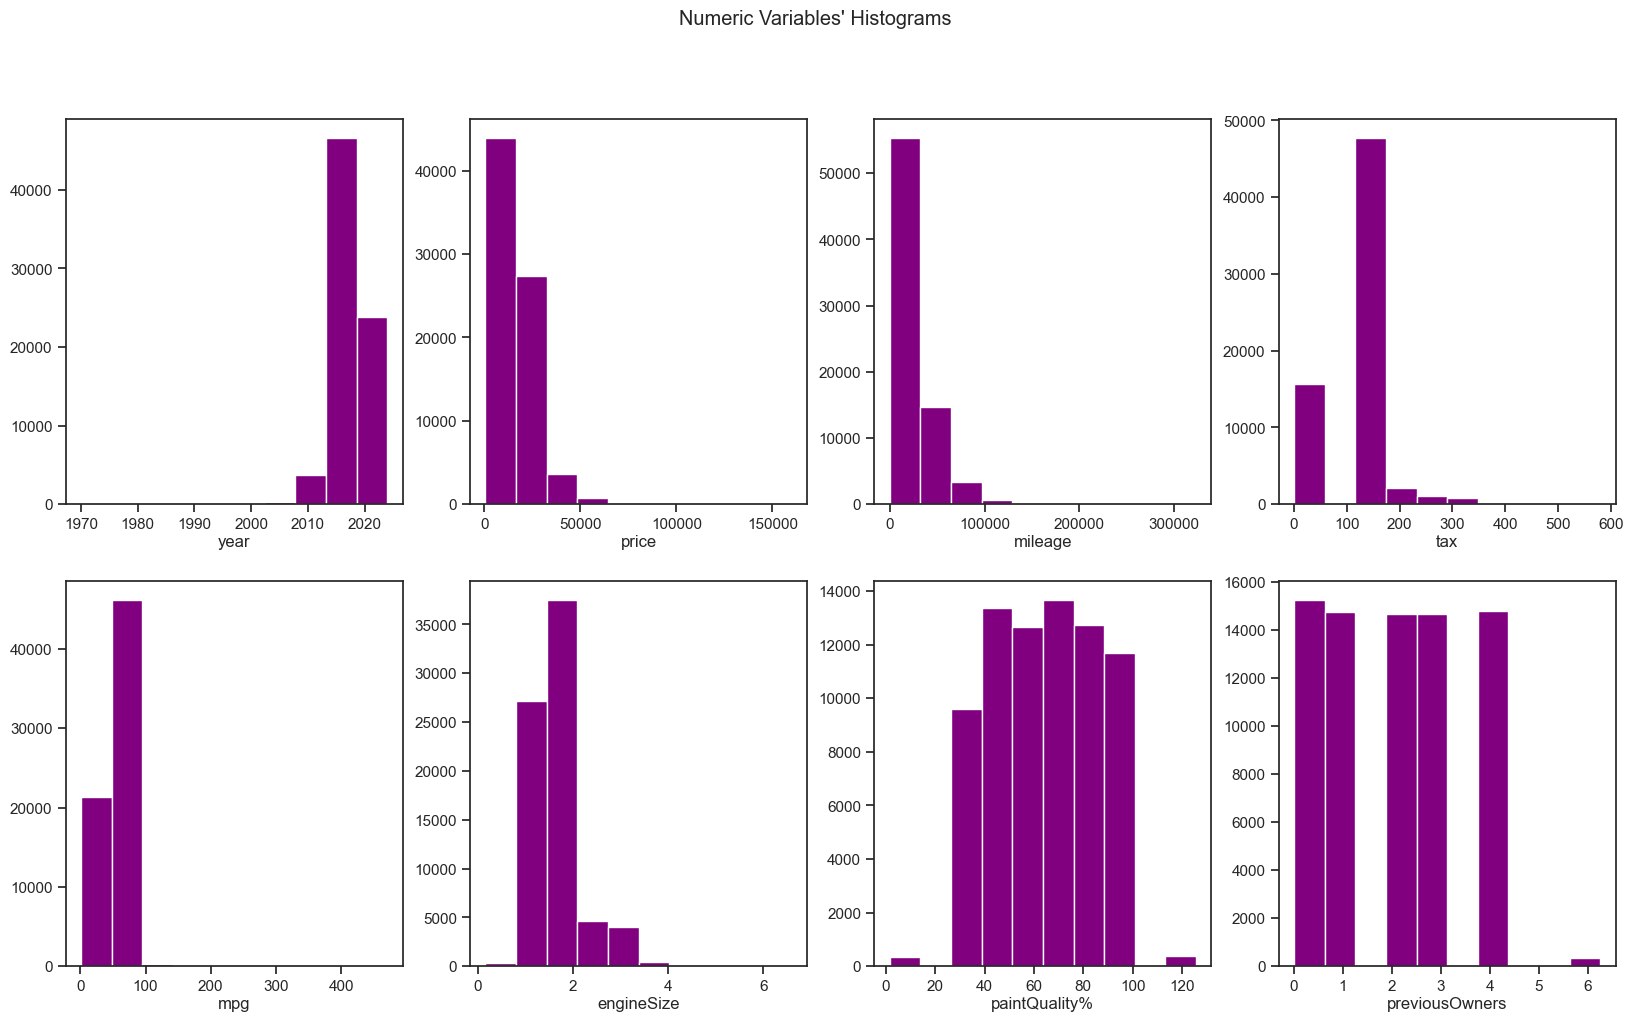

In [1097]:
sp_rows = 2
sp_cols = 4


#Histograms
sns.set_style("ticks")
# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): 
    ax.hist(df_train[feat], color=("purple"))
    ax.set_title(feat, y=-0.13)  
# Layout
plt.suptitle("Numeric Variables' Histograms")

### **Boxplot**

We can also plot the boxplot of all the numerical features.

Text(0.5, 0.98, 'BoxPlots')

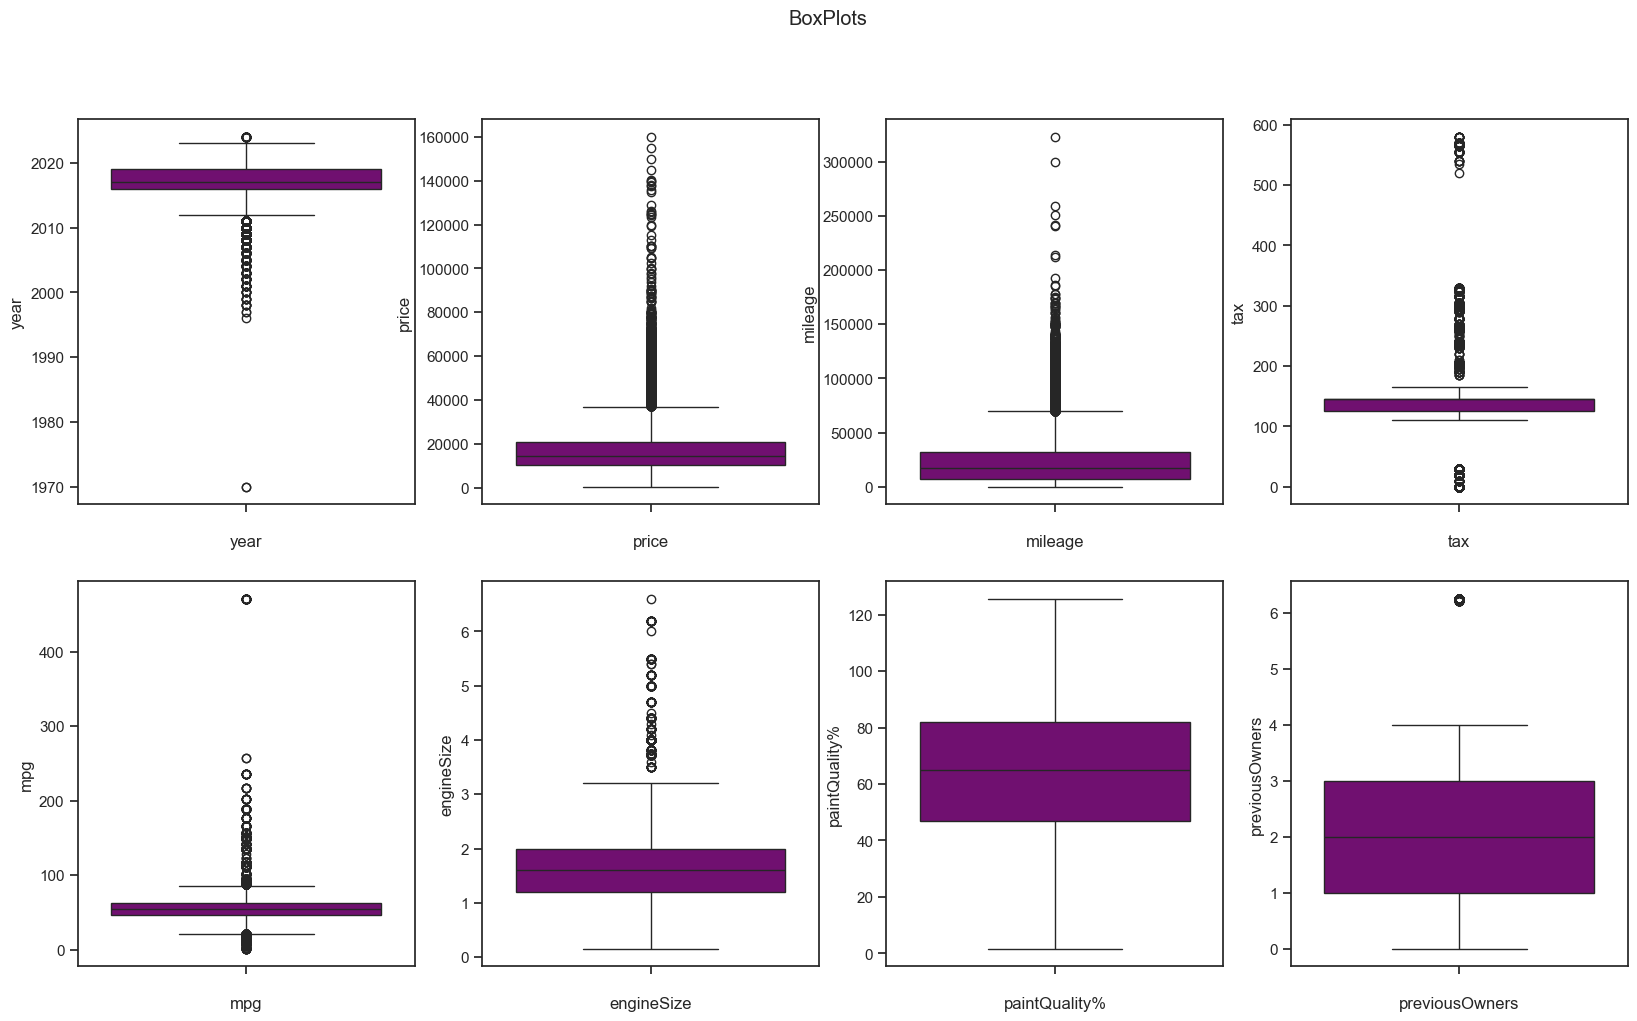

In [1098]:
#boxplot
# Prepare figure. Create individual axes where each boxplot will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(y=df_train[feat],ax=ax, color=("purple"))
    ax.set_title(feat, y=-0.13) 

plt.suptitle("BoxPlots")



### **BarPlot**

For categorical features we will observe them via a Bar Plot.

Text(0.5, 0.98, "Categorical Variables' Histplot")

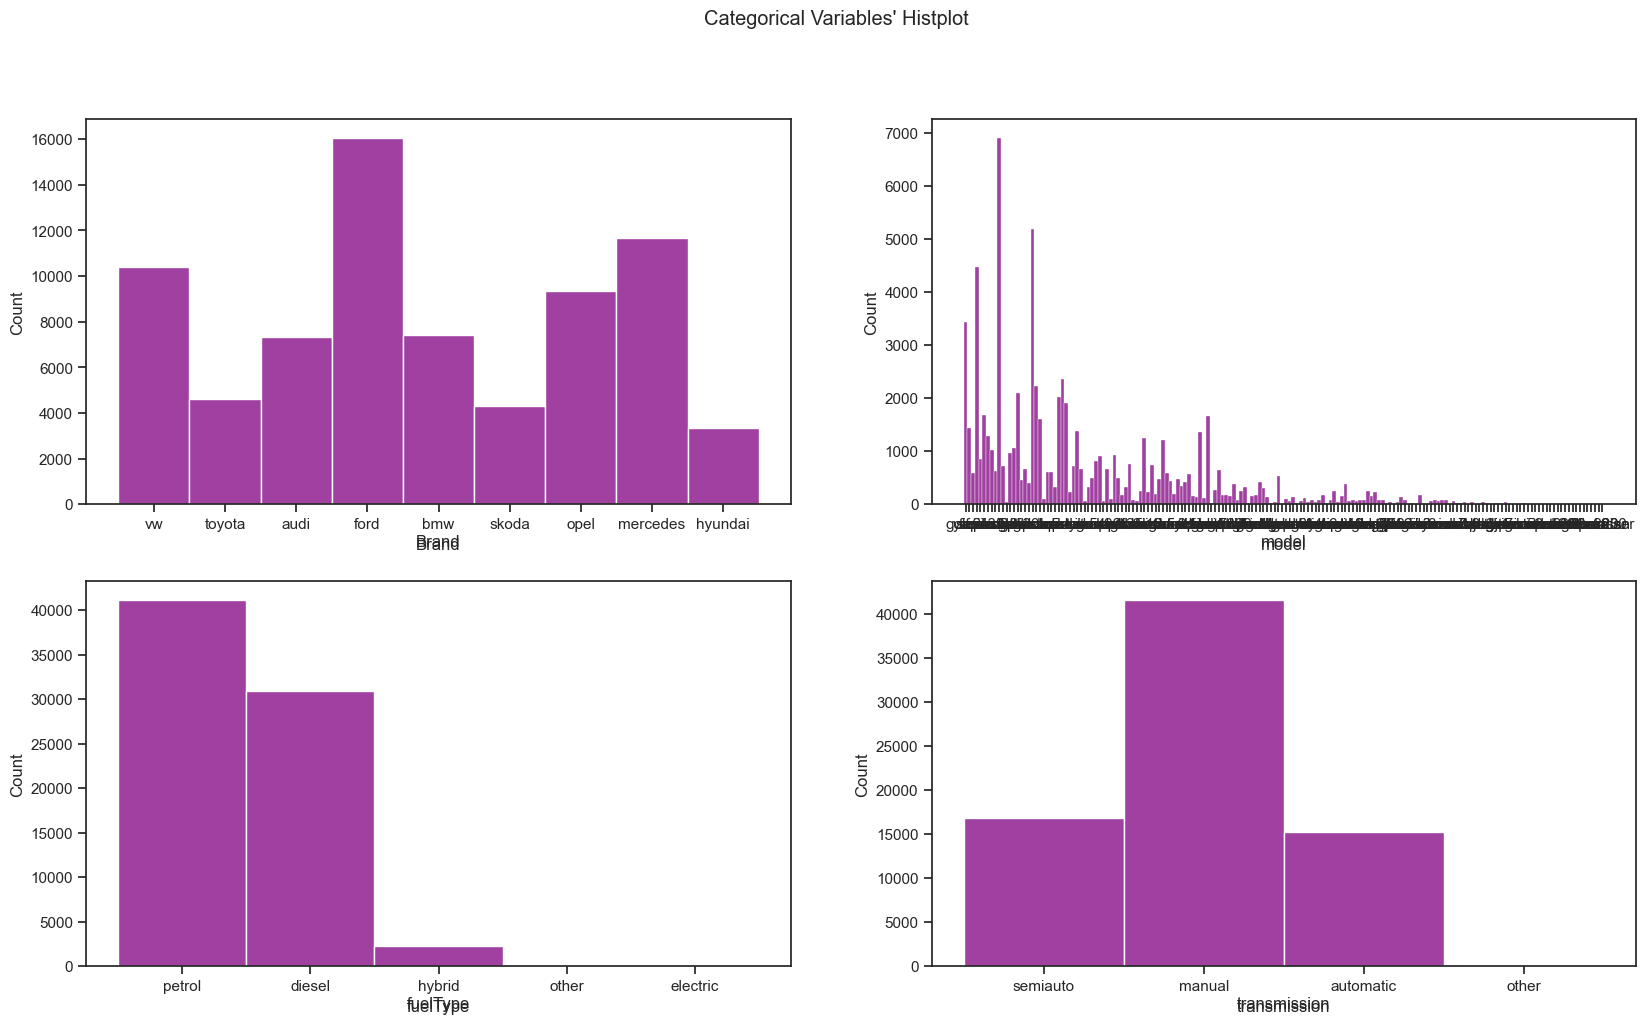

In [1099]:
fig, axes = plt.subplots(2, 
                         2, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten(), cat_features): 
    sns.histplot(x=df_train[feat],ax=ax, color=("purple"))
    ax.set_title(feat, y=-0.13)



plt.suptitle("Categorical Variables' Histplot")

For better visualization plots we targetted important intervals.

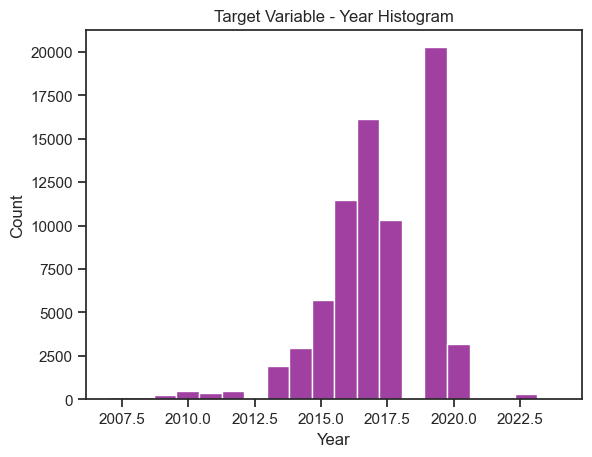

In [1100]:
# Histogram of variable 'year' after 2007
sns.histplot(df_train[df_train["year"] >= 2007]["year"].astype(int), bins=20, color=("purple"))
plt.title("Target Variable - Year Histogram")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show() 

In [1101]:
#Isto nao me esta a dar bem
"""
# 1. Calculate the value counts for the 'model' feature
model_counts = df_train['model'].value_counts()

# 2. Filter to keep only the models that appear more than 500 times
popular_models = model_counts.index

# 3. Create a filtered DataFrame containing only the popular models
#    We use .isin() to check if the model name is in our 'popular_models' list
df_train_filtered = df_train[df_train['model'].isin(popular_models)]

# 4. Create the countplot using the filtered data
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train_filtered, x='model', palette='Purples', order = popular_models)

# 5. Add titles and labels for clarity
plt.title("Categorical Variable - Popular Model Countplot")
plt.xlabel("Model")
plt.ylabel("Count")

# 6. Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# 7. Display the plot
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

"""

'\n# 1. Calculate the value counts for the \'model\' feature\nmodel_counts = df_train[\'model\'].value_counts()\n\n# 2. Filter to keep only the models that appear more than 500 times\npopular_models = model_counts.index\n\n# 3. Create a filtered DataFrame containing only the popular models\n#    We use .isin() to check if the model name is in our \'popular_models\' list\ndf_train_filtered = df_train[df_train[\'model\'].isin(popular_models)]\n\n# 4. Create the countplot using the filtered data\nplt.figure(figsize=(12, 6))\nsns.countplot(data=df_train_filtered, x=\'model\', palette=\'Purples\', order = popular_models)\n\n# 5. Add titles and labels for clarity\nplt.title("Categorical Variable - Popular Model Countplot")\nplt.xlabel("Model")\nplt.ylabel("Count")\n\n# 6. Rotate x-axis labels for better readability\nplt.xticks(rotation=45, ha=\'right\')\n\n# 7. Display the plot\nplt.tight_layout() # Adjust layout to prevent labels from being cut off\nplt.show()\n\n'

 <h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Multivariate Analysis
<h3>

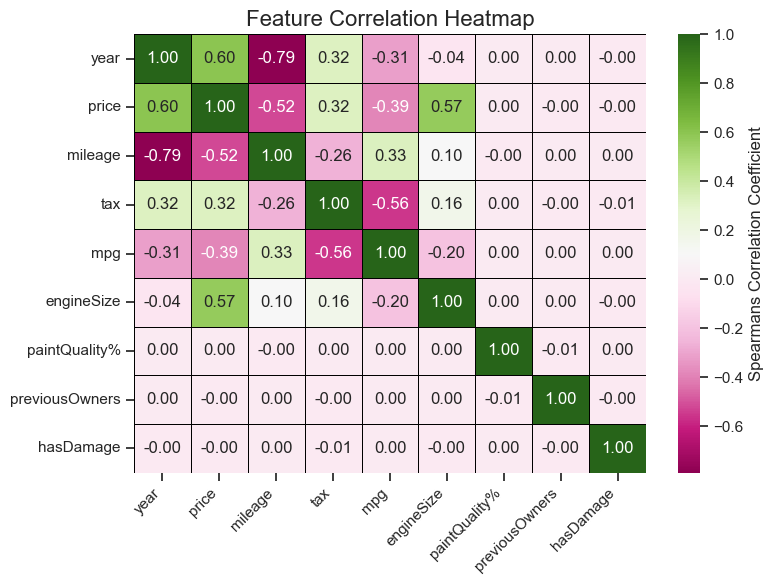

In [1102]:

correlation_matrix_spearman = df_train[metric_features].corr(method='spearman')

plt.figure(figsize=(8, 6))

sns.heatmap(
    correlation_matrix_spearman,
    annot=True,     
    fmt=".2f",      
    cmap='PiYG',
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Spearmans Correlation Coefficient'}
)

plt.title('Feature Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Relationship with `price`
- **`year` ↗ `price` (ρ = 0.60)** → Newer cars tend to be more expensive.  
- **`mileage` ↘ `price` (ρ = -0.52)** → Cars with higher mileage usually have lower prices.  
- **`engineSize` ↗ `price` (ρ = 0.57)** → Larger engines are associated with higher prices.  
- **`mpg` ↘ `price` (ρ = -0.39)** → Cars with higher fuel efficiency are typically cheaper, possibly due to smaller engines or economy-focused models.  
- **`tax` ↗ `price` (ρ = 0.32)** → Higher tax values tend to correspond to higher-priced cars, likely reflecting larger or more powerful vehicles.

#### Relationships between predictors
- **`year` ↘ `mileage` (ρ = -0.79)** → Newer cars have lower mileage, a strong and expected inverse relationship.  
- **`tax` ↘ `mpg` (ρ = -0.56)** → Cars that consume less fuel (higher mpg) generally have lower taxes.  
- **`engineSize` ↗ `tax` (ρ = 0.16)** → Bigger engines tend to be associated with higher taxes.

#### Low-correlation or constant features
- **`paintQuality%`, `previousOwners`, `hasDamage`** show near-zero correlations with all other variables.  
  This could indicate:
  - Low variability or constant values in these columns, or  
  - Poor data quality (e.g., missing or improperly encoded values).

#### Key takeaways
- Strongest predictors of price: **`year`, `mileage`, and `engineSize`**.  
- Potentially irrelevant or flat features: **`paintQuality%`, `hasDamage`, and `previousOwners`** — these might be reviewed or excluded from feature selection.  
- The use of **Spearman’s rank correlation** was appropriate, as some relationships are **monotonic but not linear**.

---

By observing the Scatter Plot below we can assume these variables are strongly negatively correlated. On the other hand, for 'mileage' inferior to around 5000 (miles) we notice a large variation in 'price'.

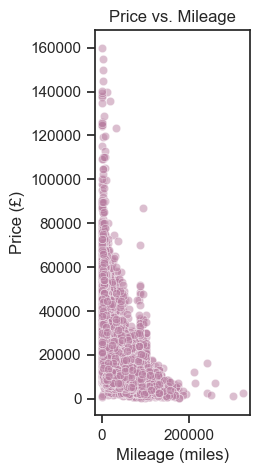

In [1103]:
sns.set_style("ticks")


plt.figure(figsize=(2, 5))
sns.scatterplot(x='mileage', y='price', data=df_train, alpha=0.5, color="#B87EA1")
plt.title('Price vs. Mileage')
plt.xlabel('Mileage (miles)')
plt.ylabel('Price (£)')

plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

We understand that these two features are positively correlated. The cars with the highest selling price are the most recent ones, as a whole.

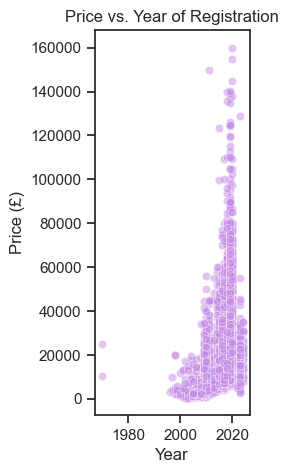

In [1104]:
plt.figure(figsize=(2, 5))
sns.scatterplot(x='year', y='price', data=df_train, alpha=0.5, color='#C48AE6')
plt.title('Price vs. Year of Registration')
plt.xlabel('Year')
plt.ylabel('Price (£)')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

BMW and Mercedes have the highest median value, while VW and Audi have a large price range. Opel and Toyota appear to be the most accecible brands.

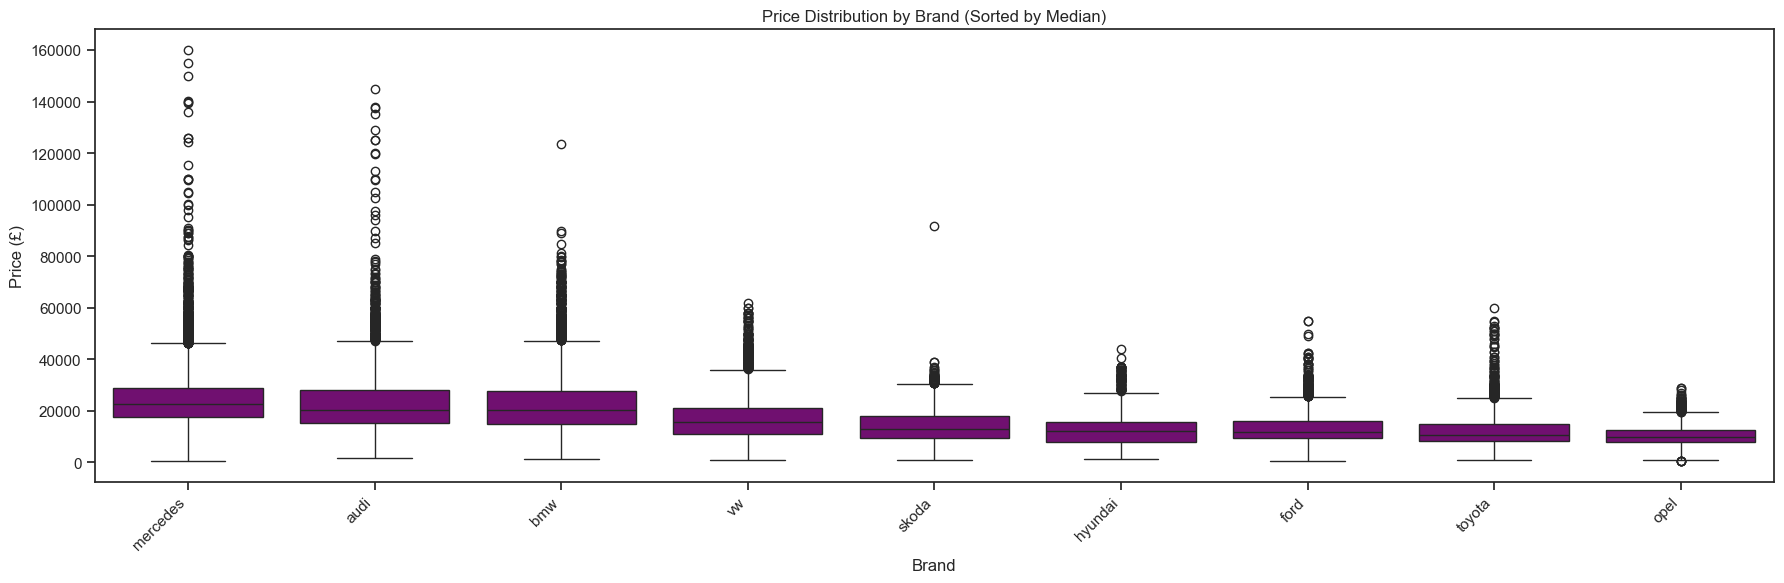

In [1105]:
plt.figure(figsize=(18, 6))

median_price = df_train.groupby('Brand')['price'].median().sort_values(ascending=False)

sns.boxplot(x='Brand', y='price', data=df_train, order=median_price.index, color='purple')
plt.title('Price Distribution by Brand (Sorted by Median)')
plt.xlabel('Brand')
plt.ylabel('Price (£)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')

In [1106]:
X = df_train.drop('price', axis = 1)
y = df_train['price']
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)


metric_features.remove('price')
print(metric_features)

print(X_train.shape)
print(y_train.shape)





['year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'hasDamage']
(60775, 12)
(60775,)


 <h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Outlier Analysis on Numerical Variables
<h3>

### IQR

Checking by the standard IQR analysis the outliers that are present in our variable.

In [1107]:

for col in metric_features:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    outliers = X_train[(X_train[col] < lower) | (X_train[col] > upper)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(X_train):.2%})")
    

year: 1362 outliers (2.24%)
mileage: 2573 outliers (4.23%)
tax: 15953 outliers (26.25%)
mpg: 922 outliers (1.52%)
engineSize: 520 outliers (0.86%)
paintQuality%: 0 outliers (0.00%)
previousOwners: 300 outliers (0.49%)
hasDamage: 1240 outliers (2.04%)


Only 'tax' has a significant outlier percentage. The others might demonstrate different behaviours only.

Therefore, we can manually remove outliers from 'mileage', 'tax' and 'mpg' as the we can clearly see a separation on the boxplot made previously

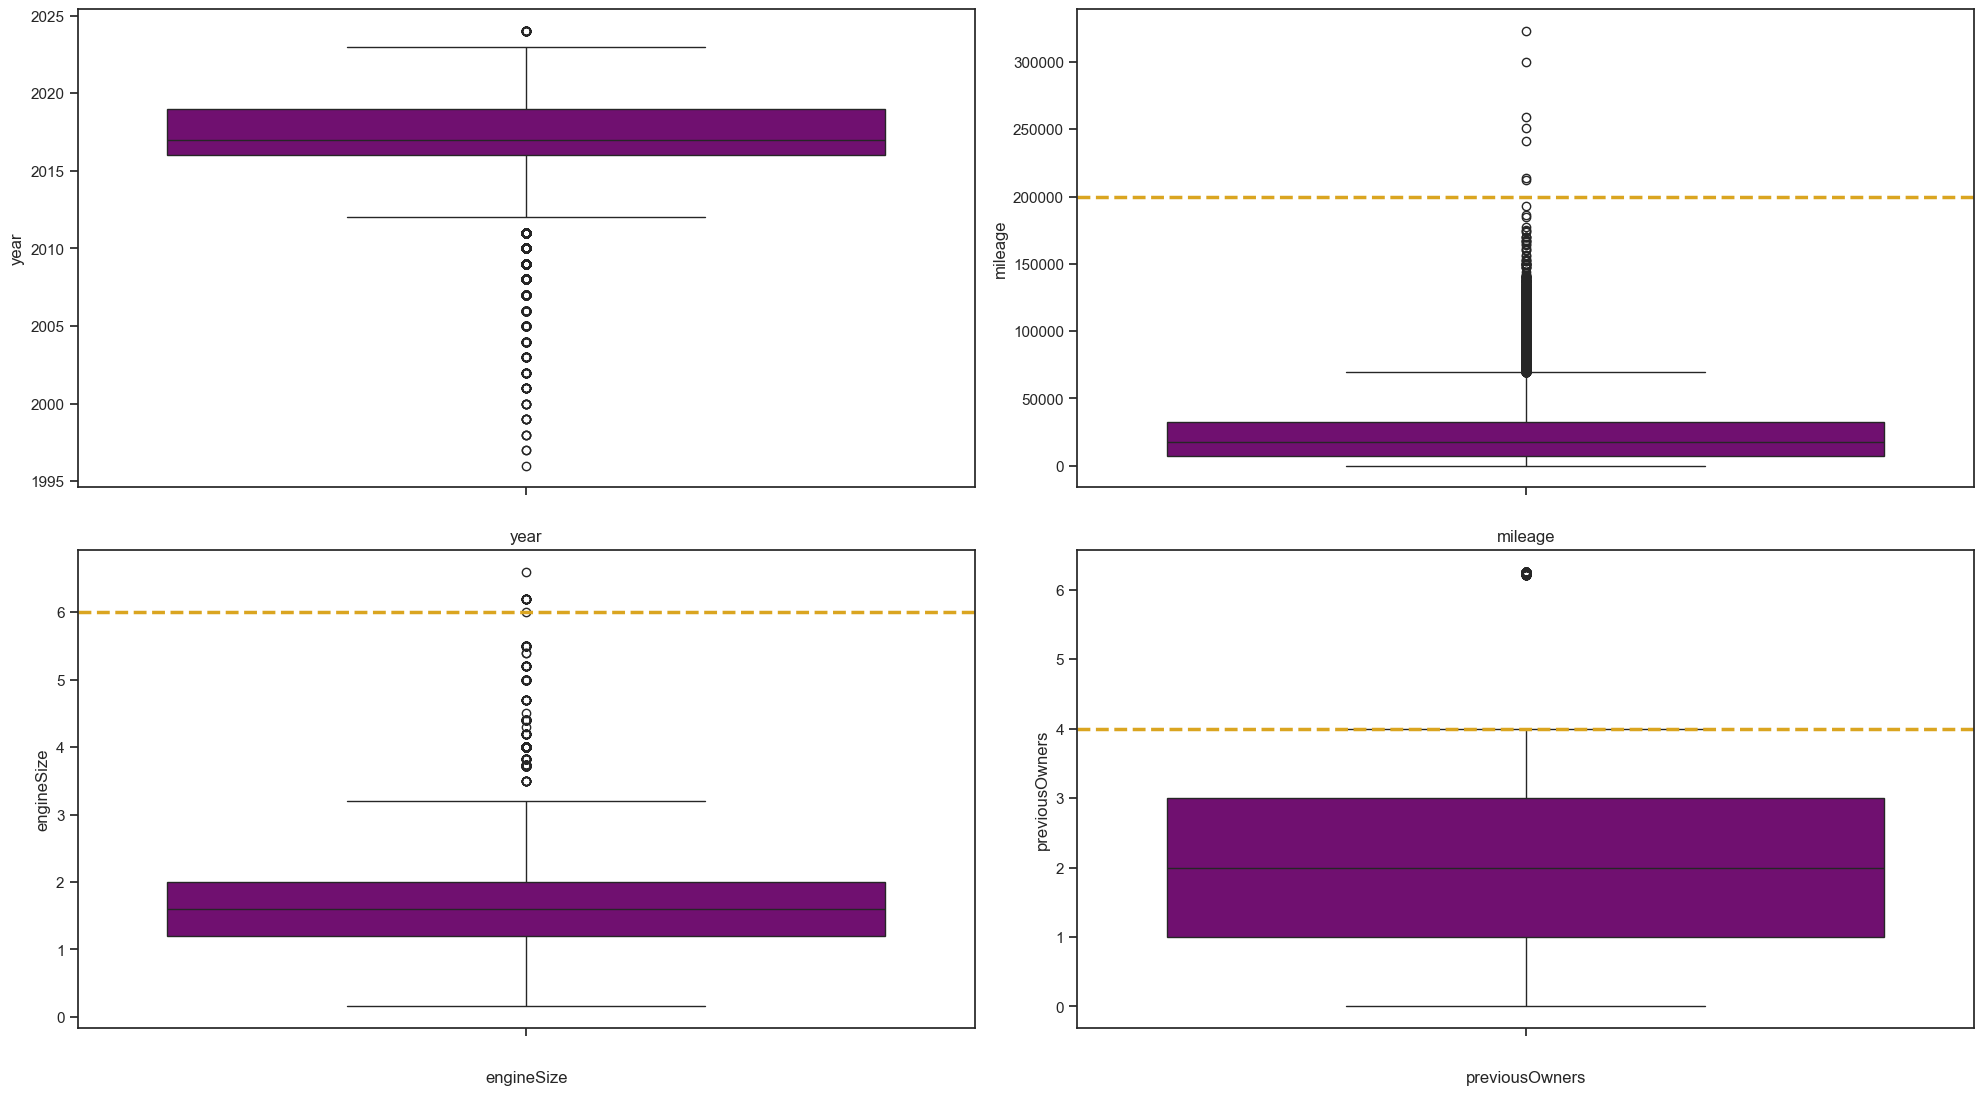

In [1108]:
sns.set_style("ticks")
fig, axes = plt.subplots(2, 
                         2, 
                         figsize=(20, 11))

lines = {'mileage': 200000, 'tax': 350, 'engineSize': 6, 'previousOwners': 4}

for ax, feat in zip(axes.flatten(), metric_features[:2] + ['engineSize'] + ['previousOwners']):
    sns.boxplot(y=X_train[feat], color='purple', ax=ax)
    ax.set_title(feat, y=-0.13)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
    
    
    if feat in lines:
        ax.axhline(lines[feat], color='goldenrod', linestyle='--', linewidth=2.5)

plt.tight_layout()
plt.show()

### Manual Arrangement

Now we will manually remove the outliers on these 3 features.

In [1109]:
#remove outliers from tax
X_manuallyremoved = X_train[X_train['tax'] < 400]
print('Percentage of data kept after removing outliers:', 
      np.round(X_manuallyremoved.shape[0] / X_train.shape[0], 4)*100,"%")

#remove outliers from previous owners
X_manuallyremoved=X_manuallyremoved[X_manuallyremoved['previousOwners']<= 4]
print('Percentage of data kept after removing outliers:', 
      np.round(X_manuallyremoved.shape[0] / X_train.shape[0], 4)*100,"%")

#remove outliers from engineSize
X_manuallyremoved=X_manuallyremoved[X_manuallyremoved['engineSize']<= 6]
print('Percentage of data kept after removing outliers:', 
      np.round(X_manuallyremoved.shape[0] / X_train.shape[0], 4)*100,"%")

#remove outliers from mileage
X_manuallyremoved=X_manuallyremoved[X_manuallyremoved['mileage']<= 200000]
print('Percentage of data kept after removing outliers:', 
      np.round(X_manuallyremoved.shape[0] / X_train.shape[0], 4)*100,"%")

print("Número final de observações:", X_train.shape[0])

##CORTAR NO VALIDATION SET POR ESTAS MEDIDAS???????!!!!

#remove outliers from tax
X_manuallyremoved_V = X_val[X_val['tax'] < 400]
print('Percentage of data kept after removing outliers:', 
      np.round(X_manuallyremoved_V.shape[0] / X_val.shape[0], 4)*100,"%")

#remove outliers from previous owners
X_manuallyremoved_V=X_manuallyremoved_V[X_val['previousOwners']<= 4]
print('Percentage of data kept after removing outliers:', 
      np.round(X_manuallyremoved_V.shape[0] / X_val.shape[0], 4)*100,"%")

#remove outliers from engineSize
X_manuallyremoved_V=X_manuallyremoved_V[X_manuallyremoved_V['engineSize']<= 6]
print('Percentage of data kept after removing outliers:', 
      np.round(X_manuallyremoved_V.shape[0] / X_val.shape[0], 4)*100,"%")

#remove outliers from mileage
X_manuallyremoved_V=X_manuallyremoved_V[X_manuallyremoved_V['mileage']<= 200000]
print('Percentage of data kept after removing outliers:', 
      np.round(X_manuallyremoved_V.shape[0] / X_val.shape[0], 4)*100,"%")

print("Número final de observações:", X_val.shape[0])

Percentage of data kept after removing outliers: 88.97 %
Percentage of data kept after removing outliers: 86.69 %
Percentage of data kept after removing outliers: 84.61 %
Percentage of data kept after removing outliers: 82.50999999999999 %
Número final de observações: 60775
Percentage of data kept after removing outliers: 88.85 %
Percentage of data kept after removing outliers: 86.61999999999999 %
Percentage of data kept after removing outliers: 84.76 %
Percentage of data kept after removing outliers: 82.71 %
Número final de observações: 15194


In [1110]:
for col in metric_features:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    outliers = X_train[(X_train[col] < lower) | (X_train[col] > upper)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(X_train):.2%})")

year: 1362 outliers (2.24%)
mileage: 2573 outliers (4.23%)
tax: 15953 outliers (26.25%)
mpg: 922 outliers (1.52%)
engineSize: 520 outliers (0.86%)
paintQuality%: 0 outliers (0.00%)
previousOwners: 300 outliers (0.49%)
hasDamage: 1240 outliers (2.04%)


### Capping

'engineSize','mileage' and 'mpg' outliers are still noticiable but a very small percentage. 

For 'tax' we have decided to cap the values that are too extreme in the dataset. If we had decided to remove them, we would lose various training data. 

(Log transformation was considered to handle the skewness in the 'tax', but discarded because 'tax' is a discrete and highly categorical-like feature with many zero values).

In [1111]:
upper = X_manuallyremoved['tax'].quantile(0.95)
X_manuallyremoved['tax'] = np.clip(X_manuallyremoved['tax'], 0, upper)
X_manuallyremoved_V['tax'] = np.clip(X_manuallyremoved_V['tax'], 0, upper)
print(f"Upper cap set at: {upper}")


Upper cap set at: 200.0


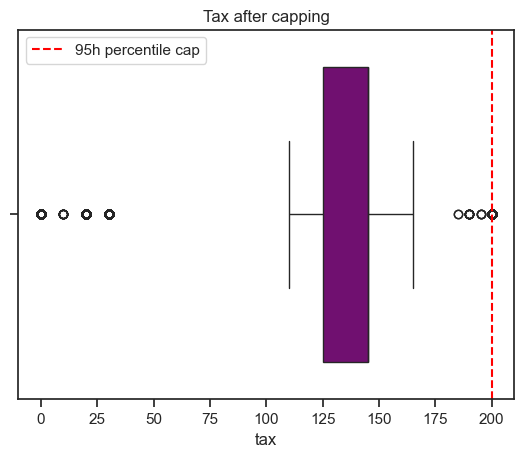

In [1112]:
sns.boxplot(x=X_manuallyremoved['tax'], color='Purple')
plt.axvline(upper, color='red', linestyle='--', label='95h percentile cap')
plt.title("Tax after capping")
plt.legend()
plt.show()



Setting the training set to its' form with the outlier treatment.

In [1113]:
X_train=X_manuallyremoved
X_val=X_manuallyremoved_V

 <h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Missing Values Treatment
 <h3>

In [1114]:
#slight correction of NaN values that werent marked as real NaN
# Converter strings problemáticas e objetos 'None' em np.nan
for df in [X_train, X_val, X_test]:
    df.replace(["nan", "NaN", "None", "", " "], np.nan, inplace=True)




Tax can depend on the size of the car (understandable by the 'model', if SUV, town car, etc.) and on the 'fuelType' they use, since nowadays, electric cars have several benefits.

In [1115]:
# calculates median on train
tax_medians = X_train.groupby(['model', 'fuelType'])['tax'].median()

#  calculates global median (backup)
global_tax_median = X_train['tax'].median()

# auxiliary func to fill Nan
def fill_tax(row):
    if pd.isna(row['tax']):
        return tax_medians.get((row['model'], row['fuelType']), global_tax_median)
    else:
        return row['tax']


X_train['tax'] = X_train.apply(fill_tax, axis=1)
X_val['tax'] = X_val.apply(fill_tax, axis=1)
X_test['tax'] = X_test.apply(fill_tax, axis=1)


X_train['tax'] = X_train['tax'].fillna(0)
X_val['tax'] = X_val['tax'].fillna(0)
X_test['tax'] = X_test['tax'].fillna(0)

X_val.isna().sum()

Brand             252
model             264
year              240
transmission      362
mileage             0
fuelType          276
tax                 0
mpg               267
engineSize          0
paintQuality%     232
previousOwners      0
hasDamage           0
dtype: int64

Similar cars, by the same manufacturer, usually have the same 'mileage'. Consequently, let us use that knowledge to fill in the missing values. On the other hand, KNN filling would create a bias due to the high skewness in the distribution of this variable.

In [1116]:
medianT_local=X_train.groupby(['Brand', 'model','year'])['mileage'].transform(lambda x: x.fillna(x.median()))
medianT_global=X_train['mileage'].median()      

X_train['mileage'] = medianT_local
X_val['mileage']=medianT_local
X_test['mileage']=medianT_local

#if missing values still exist then we fill with the global median
X_train['mileage'] = X_train['mileage'].fillna(medianT_global)
X_val['mileage'] = X_val['mileage'].fillna(medianT_global)
X_test['mileage'] = X_test['mileage'].fillna(medianT_global)

X_val.isna().sum()

Brand             252
model             264
year              240
transmission      362
mileage             0
fuelType          276
tax                 0
mpg               267
engineSize          0
paintQuality%     232
previousOwners      0
hasDamage           0
dtype: int64

The type of engine depends solely on the manufacturer of the car

In [1117]:

engine_medians = X_train.groupby(['Brand', 'model'])['engineSize'].median()

global_engine_median = X_train['engineSize'].median()


# auxiliary func to fill Nan
def fill_engine(row):
    if pd.isna(row['engineSize']):
        return tax_medians.get((row['model'], row['Brand']), global_tax_median)
    else:
        return row['engineSize']


X_train['engineSize'] = X_train.apply(fill_engine, axis=1)

X_val['engineSize'] = X_val.apply(fill_engine, axis=1)

X_test['engineSize'] = X_test.apply(fill_engine, axis=1)

X_train.isna().sum()

Brand              996
model              988
year               998
transmission      1518
mileage              0
fuelType           977
tax                  0
mpg               1044
engineSize           0
paintQuality%     1017
previousOwners       0
hasDamage            0
dtype: int64

The measure of 'mpg' (miles per galon) is highly related to which fuel type the car is using, the type of car and the size of the engine.

In [1118]:
mpg_medians = X_train.groupby(['Brand', 'fuelType', 'engineSize'])['mpg'].median()

global_mpg_median = X_train['mpg'].median()


# auxiliary func to fill Nan
def fill_mpg(row):
    if pd.isna(row['mpg']):
        return tax_medians.get((row['fuelType'], row['Brand'], row['engineSize']), global_tax_median)
    else:
        return row['mpg']


X_train['mpg'] = X_train.apply(fill_mpg, axis=1)

X_val['mpg'] = X_val.apply(fill_mpg, axis=1)

X_test['mpg'] = X_test.apply(fill_mpg, axis=1)

X_val.isna().sum()

Brand             252
model             264
year              240
transmission      362
mileage             0
fuelType          276
tax                 0
mpg                 0
engineSize          0
paintQuality%     232
previousOwners      0
hasDamage           0
dtype: int64

In [1119]:

min_samples = 5


group_median_model = (
    X_train.groupby(["Brand", "model"])["year"]
    .apply(lambda x: x.median() if len(x) >= min_samples else np.nan)
)

group_median_brand = X_train.groupby("Brand")["year"].median()

global_median = X_train["year"].median()

# auxiliar
def fill_year(row):
    if pd.notna(row["year"]):
        return row["year"]
    val = group_median_model.get((row["Brand"], row["model"]))
    if pd.isna(val):
        val = group_median_brand.get(row["Brand"], global_median)
    return val if pd.notna(val) else global_median

# 
X_train["year"] = X_train.apply(fill_year, axis=1)

X_val["year"] = X_val.apply(fill_year, axis=1)

X_test["year"] = X_test.apply(fill_year, axis=1)

    
X_train.isna().sum()

Brand              996
model              988
year                 0
transmission      1518
mileage              0
fuelType           977
tax                  0
mpg                  0
engineSize           0
paintQuality%     1017
previousOwners       0
hasDamage            0
dtype: int64

Creation of a KNN imputer to fill in the missing values based on the nearest neighbor in the not NaN categories that exist. Therefore we are finding the closest match possible to the data missing

In [1121]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

def fill_knn(df, column, categorical_cols=['Brand', 'model'], numeric_cols=None, k=5,
             fit=True, encoders=None, imputer=None, scaler=None):

    df_copy = df.copy()

    # 1. Prepare categorical encoders

    if fit:
        encoders = {}
        for col in categorical_cols + [column]:
            if df_copy[col].dtype == "object":
                le = LabelEncoder()
                df_copy[col] = df_copy[col].astype(str)
                df_copy[col] = le.fit_transform(df_copy[col])
                encoders[col] = le
    else:
        # use existing encoders from train
        for col, le in encoders.items():
            if col in df_copy.columns:
                df_copy[col] = df_copy[col].astype(str)
                # handle unseen categories
                df_copy[col] = df_copy[col].apply(lambda x: x if x in le.classes_ else le.classes_[0])
                df_copy[col] = le.transform(df_copy[col])


    # 2. Select subset (remove duplicates)

    subset_cols = list(dict.fromkeys(categorical_cols + (numeric_cols or []) + [column]))
    subset = df_copy[subset_cols]


    # 3. Standardize + Impute

    if fit:
        scaler = StandardScaler()
        imputer = KNNImputer(n_neighbors=k, weights='distance')
        scaled = scaler.fit_transform(subset)
        imputed = imputer.fit_transform(scaled)
    else:
        scaled = scaler.transform(subset)
        imputed = imputer.transform(scaled)


    # 4. Inverse transform + replace
    
    subset_imputed = pd.DataFrame(scaler.inverse_transform(imputed), columns=subset_cols, index=df.index)
    missing_mask = df[column].isna()

    if column in encoders and df[column].dtype == "object":
        inv = encoders[column].inverse_transform(subset_imputed[column].round().astype(int))
        df.loc[missing_mask, column] = inv[missing_mask]
    else:
        df.loc[missing_mask, column] = subset_imputed.loc[missing_mask, column]

    return df, encoders, imputer, scaler




X_train, enc_trans, imp_trans, sc_trans = fill_knn(
    X_train, 'transmission', ['Brand', 'model', 'fuelType'], metric_features, fit=True
)
X_train, enc_fuel, imp_fuel, sc_fuel = fill_knn(
    X_train, 'fuelType', ['Brand', 'model', 'transmission'], metric_features, fit=True
)
X_train, enc_paint, imp_paint, sc_paint = fill_knn(
    X_train, 'paintQuality%', ['Brand','model','transmission','fuelType'], metric_features, fit=True
)


X_val, _, _, _ = fill_knn(
    X_val, 'transmission', ['Brand', 'model', 'fuelType'], metric_features,
    fit=False, encoders=enc_trans, imputer=imp_trans, scaler=sc_trans
)
X_val, _, _, _ = fill_knn(
    X_val, 'fuelType', ['Brand', 'model', 'transmission'], metric_features,
    fit=False, encoders=enc_fuel, imputer=imp_fuel, scaler=sc_fuel
)
X_val, _, _, _ = fill_knn(
    X_val, 'paintQuality%', ['Brand','model','transmission','fuelType'], metric_features,
    fit=False, encoders=enc_paint, imputer=imp_paint, scaler=sc_paint
)


X_test, _, _, _ = fill_knn(
    X_test, 'transmission', ['Brand', 'model', 'fuelType'], metric_features,
    fit=False, encoders=enc_trans, imputer=imp_trans, scaler=sc_trans
)
X_test, _, _, _ = fill_knn(
    X_test, 'fuelType', ['Brand', 'model', 'transmission'], metric_features,
    fit=False, encoders=enc_fuel, imputer=imp_fuel, scaler=sc_fuel
)
X_test, _, _, _ = fill_knn(
    X_test, 'paintQuality%', ['Brand','model','transmission','fuelType'], metric_features,
    fit=False, encoders=enc_paint, imputer=imp_paint, scaler=sc_paint
)



In [1122]:
X_train, enc_paint, imp_paint, sc_paint = fill_knn(
    X_train, 'model', ['Brand','transmission','fuelType'], metric_features, fit=True
)

X_val, _, _, _ = fill_knn(
    X_val, 'model', ['Brand','transmission','fuelType'], metric_features,
    fit=False, encoders=enc_paint, imputer=imp_paint, scaler=sc_paint
)

X_test, _, _, _ = fill_knn(
    X_test, 'model', ['Brand','transmission','fuelType'], metric_features,
    fit=False, encoders=enc_paint, imputer=imp_paint, scaler=sc_paint
)

print(X_train.isna().sum())
print(X_val.isna().sum())
print(X_test.isna().sum())


Brand             996
model               0
year                0
transmission        0
mileage             0
fuelType            0
tax                 0
mpg                 0
engineSize          0
paintQuality%       0
previousOwners      0
hasDamage           0
dtype: int64
Brand             252
model               0
year                0
transmission        0
mileage             0
fuelType            0
tax                 0
mpg                 0
engineSize          0
paintQuality%       0
previousOwners      0
hasDamage           0
dtype: int64
Brand             649
model               0
year                0
transmission        0
mileage             0
fuelType            0
tax                 0
mpg                 0
engineSize          0
paintQuality%       0
previousOwners    597
hasDamage           0
dtype: int64


Firstly, lets fix the NaNs values in 'Brand' by the model they are associated with (we know each model is designed by one unique and single brand).

In [1123]:
mask_nanBrand = X_train["Brand"].isna()

toyota=["YARIS", "AYGO", "COROLLA", "CHR", "AVENSIS", "PRIUS","RAV4", "HILUX", "VERSO", "SUPRA", "LANDCRUISER","CAMRY", "PROACEVERSO", "URBANCRUISER", "AURIS", "GT86"]
toyota_brand=[x.lower() for x in toyota]

ford=["FOCUS", "FIESTA", "MONDEO", "KUGA", "GALAXY", "SMAX", "BMAX","ECOSPORT", "PUMA", "TOURNEOCUSTOM", "TOURNEOCONNECT","GRANDTOURNEOCONNECT", "CMAX", "GRANDCMAX", "EDGE","MUSTANG", "FUSION", "STREETKA", "RANGER", "ESCORT", "KA","KA+"]
ford_brand=[x.lower() for x in ford]

opel=["CORSA","MOKKAX", "ASTRA", "INSIGNIA", "MOKKA", "ZAFIRA", "VIVA","MERIVA", "ADAM", "COMBOLIFE", "CROSSLANDX", "GRANDLANDX","GTC", "ANTARA", "VIVARO", "VECTRA", "AGILA", "TIGRA","CASCADA", "AMPERA"]
opel_brand=[x.lower() for x in opel]

vw=["GOLF", "GOLFSV", "POLO", "PASSAT", "TIGUAN", "TIGUANALLSPACE","TOURAN", "TOUAREG", "TROC", "TCROSS", "ARTEON", "SHARAN","JETTA", "CC", "CARAVELLE", "CALIFORNIA", "CADDY", "CADDYMAXI","BEETLE", "SCIROCCO", "UP", "AMAROK", "EOS", "FOX"]
vw_brand=[x.lower() for x in vw]

audi=["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8","Q2", "Q3", "Q5", "Q7", "Q8", "S3", "S4", "S5", "S8","RS3", "RS4", "RS5", "RS6", "SQ5", "SQ7", "TT", "R8"]
audi_brand=[x.lower() for x in audi]

mercedes=["ACLASS", "BCLASS", "CCLASS", "ECLASS", "SCLASS","CLACLASS", "CLSCLASS", "GLACLASS", "GLBCLASS","GLCCLASS", "GLECLASS", "GLSCLASS", "GLCLASS","GCLASS", "VCLASS", "XCLASS", "SLCLASS", "SLKCLASS","MCLASS","SLC", "CLK", "CLCLASS", "CLCCLASS","MERCEDES200", "MERCEDES220", "MERCEDES230"]
mercedes_brand=[x.lower() for x in mercedes]

skoda=["FABIA", "OCTAVIA", "SUPERB", "KAROQ", "KODIAQ", "KAMIQ","YETI","YETIOUTDOOR", "SCALA", "RAPID", "CITIGO", "ROOMSTER"]
skoda_brand=[x.lower() for x in skoda]

h=["I10", "I20", "I30", "I40", "I800", "IONIQ", "KONA", "TUCSON","SANTAFE", "GETZ", "IX20", "IX35", "VELOSTER", "ACCENT", "TERRACAN"]
h_brand=[x.lower() for x in h]



X_train.loc[mask_nanBrand, "Brand"] = X_train.loc[mask_nanBrand, "model"].apply(
    lambda m: (
        "toyota" if pd.notna(m) and m in toyota_brand
        else "ford" if pd.notna(m) and m in ford_brand
        else "opel" if pd.notna(m) and m in opel_brand
        else "vw" if pd.notna(m) and m in vw_brand
        else "audi" if pd.notna(m) and m in audi_brand
        else "bmw" if pd.notna(m) and m in ["series1", "series2", "series3", "series4", "series5",
                                            "series6", "series7", "series8", "x1", "x2", "x3", "x4",
                                            "x5", "x6", "x7", "z3", "z4", "m2", "m3", "m4", "m5", "m6", 'iq']
        else "mercedes" if pd.notna(m) and m in mercedes_brand
        else "skoda" if pd.notna(m) and m in skoda_brand
        else "hyundai" if pd.notna(m) and m in h_brand
        else "seat" if pd.notna(m) and m in ["leon", "ateca", "toledo", "arona", "ibiza", "alhambra"]
        else "renault" if pd.notna(m) and m in ["kadjar"]
        else "honda" if pd.notna(m) and m in ["shuttle"]
        else None
    )
)
mask_nanBrandV = X_val["Brand"].isna()

X_val.loc[mask_nanBrandV, "Brand"] = X_val.loc[mask_nanBrandV, "model"].apply(
    lambda m: (
        "toyota" if pd.notna(m) and m in toyota_brand
        else "ford" if pd.notna(m) and m in ford_brand
        else "opel" if pd.notna(m) and m in opel_brand
        else "vw" if pd.notna(m) and m in vw_brand
        else "audi" if pd.notna(m) and m in audi_brand
        else "bmw" if pd.notna(m) and m in ["series1", "series2", "series3", "series4", "series5",
                                            "series6", "series7", "series8", "x1", "x2", "x3", "x4",
                                            "x5", "x6", "x7", "z3", "z4", "m2", "m3", "m4", "m5", "m6", 'iq']
        else "mercedes" if pd.notna(m) and m in mercedes_brand
        else "skoda" if pd.notna(m) and m in skoda_brand
        else "hyundai" if pd.notna(m) and m in h_brand
        else "seat" if pd.notna(m) and m in ["leon", "ateca", "toledo", "arona", "ibiza", "alhambra"]
        else "renault" if pd.notna(m) and m in ["kadjar"]
        else "honda" if pd.notna(m) and m in ["shuttle"]
        else None
    )
)

mask_nanBrandT = X_test["Brand"].isna()

X_test.loc[mask_nanBrandT, "Brand"] = X_test.loc[mask_nanBrandT, "model"].apply(
    lambda m: (
        "toyota" if pd.notna(m) and m in toyota_brand
        else "ford" if pd.notna(m) and m in ford_brand
        else "opel" if pd.notna(m) and m in opel_brand
        else "vw" if pd.notna(m) and m in vw_brand
        else "audi" if pd.notna(m) and m in audi_brand
        else "bmw" if pd.notna(m) and m in ["series1", "series2", "series3", "series4", "series5",
                                            "series6", "series7", "series8", "x1", "x2", "x3", "x4",
                                            "x5", "x6", "x7", "z3", "z4", "m2", "m3", "m4", "m5", "m6", 'iq']
        else "mercedes" if pd.notna(m) and m in mercedes_brand
        else "skoda" if pd.notna(m) and m in skoda_brand
        else "hyundai" if pd.notna(m) and m in h_brand
        else "seat" if pd.notna(m) and m in ["leon", "ateca", "toledo", "arona", "ibiza", "alhambra"]
        else "renault" if pd.notna(m) and m in ["kadjar"]
        else "honda" if pd.notna(m) and m in ["shuttle"]
        else None
    )
)

X_test.isna().sum()


Brand              16
model               0
year                0
transmission        0
mileage             0
fuelType            0
tax                 0
mpg                 0
engineSize          0
paintQuality%       0
previousOwners    597
hasDamage           0
dtype: int64

In [1124]:
X_test[X_test['Brand'].isna()]

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
77954,None,nan,2019.0,Automatic,17512.5,diesel,150.0,50.4,2.0,76.000000,4.0,1.0
79779,None,nan,2015.0,Manual,17512.5,diesel,20.0,68.9,2.0,93.000000,1.0,1.0
106048,None,nan,2020.0,Semi-Auto,17512.5,petrol,145.0,39.8,1.5,48.000000,4.0,1.0
81355,None,nan,2020.0,Semi-Auto,17512.5,diesel,145.0,36.7,3.0,62.000000,4.0,1.0
86100,None,nan,2013.0,Manual,17512.5,petrol,30.0,56.5,1.0,96.000000,0.0,1.0
106790,None,nan,2019.0,Semi-Auto,17512.5,nan,145.0,32.8,2.0,49.000000,4.0,1.0
81003,None,nan,2018.0,semi-auto,17512.5,diesel,145.0,49.6,2.0,49.026731,4.0,1.0
91378,None,nan,2020.0,Semi-Auto,17512.5,diesel,145.0,53.3,2.0,57.000000,NaN,1.0
108236,None,nan,2019.0,Manual,17512.5,diesel,145.0,50.4,2.0,32.000000,2.0,1.0


All the NaN left in 'Brand' come from observations in which 'model' is also unknown.

In [ ]:

print(X_train.isna().sum())
print(X_val.isna().sum())
print(X_test.isna().sum())


Brand             25
model              0
year               0
transmission       0
mileage            0
fuelType           0
tax                0
mpg                0
engineSize         0
paintQuality%      0
previousOwners     0
hasDamage          0
dtype: int64
Brand               5
model             264
year                0
transmission        0
mileage             0
fuelType            0
tax                 0
mpg                 0
engineSize          0
paintQuality%       0
previousOwners      0
hasDamage           0
dtype: int64
Brand              16
model               0
year                0
transmission        0
mileage             0
fuelType            0
tax                 0
mpg                 0
engineSize          0
paintQuality%       0
previousOwners    597
hasDamage         597
dtype: int64


Since the number is not large, we can drop them.

In [ ]:
X_train = X_train[~(X_train["Brand"].isna() & X_train["model"].isna())]
X_val   = X_val[~(X_val["Brand"].isna() & X_val["model"].isna())]

In [ ]:
#keeping the number of observations equal for coherence
car_ids=X_train.index
y_train=y_train.loc[car_ids]
y_train.shape


car_idsV=X_val.index
y_val=y_val[car_idsV]

In [ ]:
group_median_full = (
    X_train.groupby(["Brand", "model", "fuelType"])["previousOwners"]
    .apply(lambda x: x.median() if len(x) >= min_samples else np.nan)
)


group_median_brandfuel = X_train.groupby(["Brand", "fuelType"])["previousOwners"].median()


global_median = X_train["previousOwners"].median()

def fill_prevowners(row):
    if pd.notna(row["previousOwners"]):
        return row["previousOwners"]
    val = group_median_full.get((row["Brand"], row["model"], row["fuelType"]))
    if pd.isna(val):
        val = group_median_brandfuel.get((row["Brand"], row["fuelType"]), global_median)
    return val if pd.notna(val) else global_median


X_train["previousOwners"] = X_train.apply(fill_prevowners, axis=1)

X_val["previousOwners"] = X_val.apply(fill_prevowners, axis=1)

X_test["previousOwners"] = X_test.apply(fill_prevowners, axis=1)

In [ ]:
print(X_train.isna().sum())
print(X_val.isna().sum())
print(X_test.isna().sum())


Brand             25
model              0
year               0
transmission       0
mileage            0
fuelType           0
tax                0
mpg                0
engineSize         0
paintQuality%      0
previousOwners     0
hasDamage          0
dtype: int64
Brand               0
model             259
year                0
transmission        0
mileage             0
fuelType            0
tax                 0
mpg                 0
engineSize          0
paintQuality%       0
previousOwners      0
hasDamage           0
dtype: int64
Brand              16
model               0
year                0
transmission        0
mileage             0
fuelType            0
tax                 0
mpg                 0
engineSize          0
paintQuality%       0
previousOwners      0
hasDamage         597
dtype: int64


<h2 style="background-color:#E6A3D6; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
3. Feature Engineering
</h2>

'car_age': represents how old the car is.

In [ ]:
X_train['car_age']=2025-X_train['year']
X_val['car_age']=2025-X_val['year']

'mileage_per_year': normalises car usage per year.

In [ ]:
X_train['mileage_per_year'] = X_train['mileage'] / (X_train['car_age'] + 1)
X_val['mileage_per_year'] = X_val['mileage'] / (X_val['car_age'] + 1)

'is_eco': dummy variable representing if a car is environmentally friendly.

In [ ]:
eco_fuels = ['electric', 'hybrid']
X_train['is_eco'] = X_train['fuelType'].str.lower().isin(eco_fuels).astype(int)
X_val['is_eco'] = X_val['fuelType'].str.lower().isin(eco_fuels).astype(int)


'is_luxury': dummy variable that highligths more expensive brands.

In [ ]:
luxury_brands = ["bmw", "audi", "mercedes"]
X_train["is_luxury"] = X_train["Brand"].str.lower().isin(luxury_brands).astype(int)
X_val["is_luxury"] = X_val["Brand"].str.lower().isin(luxury_brands).astype(int)
# cols = list(X_val.columns)
# i, j = cols.index('is_luxury'), cols.index('is_eco')
# cols[i], cols[j] = cols[j], cols[i]   # troca as posições
# X_val = X_val[cols]




'mileage_bin': mileage discretized into five intervals representing typical usage stages.

In [ ]:
mileage_bins = [0, 10000, 50000, 100000, 150000, np.inf]
mileage_labels = ['0-10k', '10k-50k', '50k-100k', '100k-150k', '150k+']

X_train['mileage_bin'] = pd.cut(
    X_train['mileage'], bins=mileage_bins, labels=mileage_labels, include_lowest=True
)
X_val['mileage_bin'] = pd.cut(
    X_val['mileage'], bins=mileage_bins, labels=mileage_labels, include_lowest=True
)

<h2 style="background-color:#E6A3D6; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
4. Feature Selection
</h2>

We define a new object named a `X_train_num` where only the numerical variables are mantained, and a object named as `X_train_cat` with all the categorical independent variables.

In [ ]:
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)


# Repeat for Validation

X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

# Update metric features
metric_features=X_train.columns.drop(cat_features).tolist()
print(metric_features)

['year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'hasDamage', 'car_age', 'mileage_per_year', 'is_eco', 'is_luxury', 'mileage_bin']


Which scale to use?

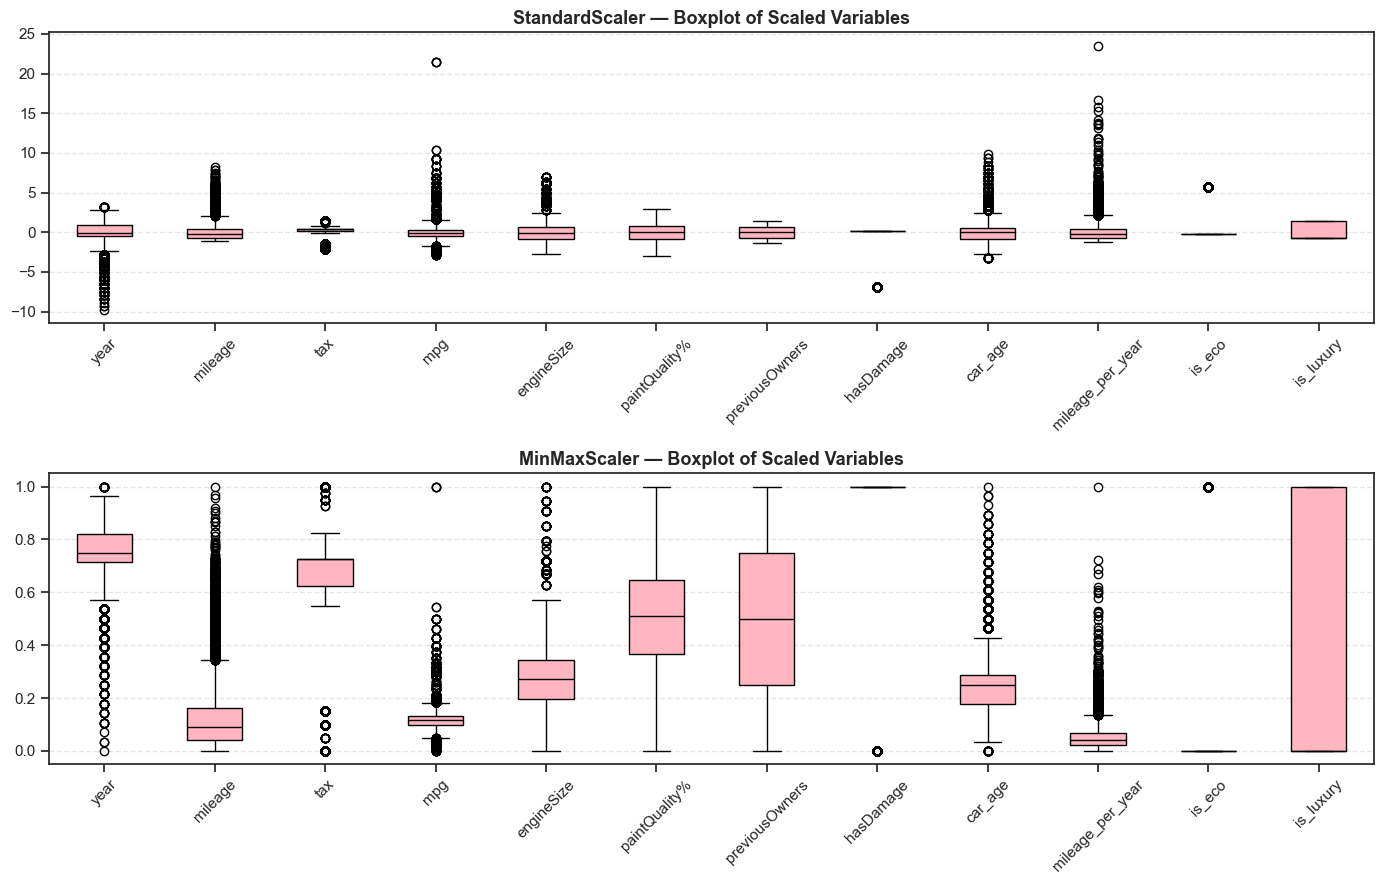

In [ ]:
sns.set_style('ticks')

scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler()
}

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 9))

if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]

for ax, (name, scaler) in zip(axes, scalers.items()):
    scaled = scaler.fit_transform(X_train_num)
    df_scaled = pd.DataFrame(scaled, columns=X_train_num.columns, index=X_train_num.index)

    ax.boxplot(
        df_scaled.values,
        labels=df_scaled.columns,
        patch_artist=True,  
        boxprops=dict(facecolor="#FFB6C1", color="black"),  
        medianprops=dict(color="black"),                   
        whiskerprops=dict(color="black"),                  
        capprops=dict(color="black")                       
    )
    ax.set_title(f"{name} — Boxplot of Scaled Variables", fontsize=13, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


After comparing the results of different scaling methods through boxplots, the **StandardScaler** was selected as the most appropriate transformation for the project.

As shown in the visual comparison, MinMaxScaler compresses most variables towards the lower end of the scale (0–1 range) due to the presence of strong outliers, which distorts the original data distribution. In contrast, StandardScaler standardizes each feature by removing the mean and scaling to unit variance, resulting in more balanced and normally distributed variables without excessively flattening the data.

Normalizing the numerical data using the **StandardScaler** from sklearn. As the end result, the data obtained has 0 mean and 1 standard-deviation.

In [ ]:
#call function
scaler = StandardScaler()

#fit to training data
scaler.fit(X_train_num)

#transform the data
X_train_num_scaled = scaler.transform(X_train_num) # this will return an array

#show results
X_train_num_scaled

array([[-0.97488181, -0.29892815,  0.11489688, ..., -0.44463123,
        -0.17596071,  1.37202442],
       [-0.04561021,  0.42694152,  0.46396428, ...,  0.60341776,
        -0.17596071, -0.72885   ],
       [ 0.41902559, -0.36205774,  0.46396428, ..., -0.23325275,
        -0.17596071, -0.72885   ],
       ...,
       [-1.43951761, -0.21260122, -2.06677432, ..., -0.43276978,
        -0.17596071, -0.72885   ],
       [-0.51024601,  0.45525096, -1.71770693, ...,  0.45010338,
        -0.17596071, -0.72885   ],
       [ 0.88366139, -0.87360512,  0.46396428, ..., -0.88032719,
        -0.17596071, -0.72885   ]])

In [ ]:
# Convert the array to a pandas dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)
X_train_num_scaled

,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage,car_age,mileage_per_year,is_eco,is_luxury
carID,,,,,,,,,,,,
46624,-0.974882,-0.298928,0.114897,0.227003,0.784249,0.161039,1.417247,0.144238,0.974882,-0.444631,-0.175961,1.372024
34236,-0.045610,0.426942,0.463964,0.242525,0.062405,0.592029,0.011758,0.144238,0.045610,0.603418,-0.175961,-0.728850
27520,0.419026,-0.362058,0.463964,0.097655,-1.200824,0.496254,1.417247,0.144238,-0.419026,-0.233253,-0.175961,-0.728850
10170,-0.974882,0.947363,0.114897,0.030393,0.603788,-1.227707,-1.393731,0.144238,0.974882,0.780647,-0.175961,1.372024
17097,1.348297,-1.102540,0.551231,-0.290391,-1.200824,-1.179819,0.714502,0.144238,-1.348297,-1.233706,-0.175961,-0.728850
...,...,...,...,...,...,...,...,...,...,...,...,...
52649,-0.045610,0.522866,0.289431,0.030393,1.506094,-1.371371,0.011758,0.144238,0.045610,0.718682,5.683087,-0.728850
19620,0.883661,-0.546286,0.463964,-0.999222,0.603788,0.304703,0.011758,0.144238,-0.883661,-0.374641,-0.175961,-0.728850
54953,-1.439518,-0.212601,-2.066774,0.620223,-1.200824,1.406122,0.714502,0.144238,1.439518,-0.432770,-0.175961,-0.728850


The scaling of the validation set should only consider information gained from the training data. 

In [ ]:
X_val_num_scaled = scaler.transform(X_val_num)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val.index)
X_val_num_scaled.head()



,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage,car_age,mileage_per_year,is_eco,is_luxury
carID,,,,,,,,,,,,
32153,0.419026,-0.259165,0.463964,0.242525,0.062405,-1.323483,1.417247,0.144238,-0.419026,-0.094160,-0.175961,-0.72885
54177,2.742205,-0.259165,-2.066774,0.620223,-1.200824,0.496254,0.011758,0.144238,-2.742205,1.808705,-0.175961,-0.72885
65762,-0.510246,-0.259165,-1.543173,-0.192086,-0.478979,2.908195,1.417247,0.144238,0.510246,-0.322504,-0.175961,-0.72885
25918,-0.045610,-0.259165,-1.717707,0.227003,-1.200824,1.645561,-1.393731,0.144238,0.045610,-0.221018,-0.175961,-0.72885
26725,-0.045610,-0.259165,0.463964,-0.802612,0.603788,-0.078400,-1.393731,0.144238,0.045610,-0.221018,-0.175961,-0.72885


 <h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Categorical Variables Selection
 <h3>

In [ ]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:#if p<alpha we reject the null and there is a relationship so the var is important for prediction
        result="{0} is IMPORTANT for Prediction".format(var)#
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)#independent H0
    print(result)

for var in X_train_cat:
    TestIndependence(X_train_cat[var],y_train, var)

Brand is IMPORTANT for Prediction
model is IMPORTANT for Prediction
transmission is IMPORTANT for Prediction
fuelType is NOT an important predictor. (Discard fuelType from model)
mileage_bin is IMPORTANT for Prediction


According to chi-square, we should discard `fuelType`.

 <h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Numerical Variables Selection
 <h3>

### **Correlations**

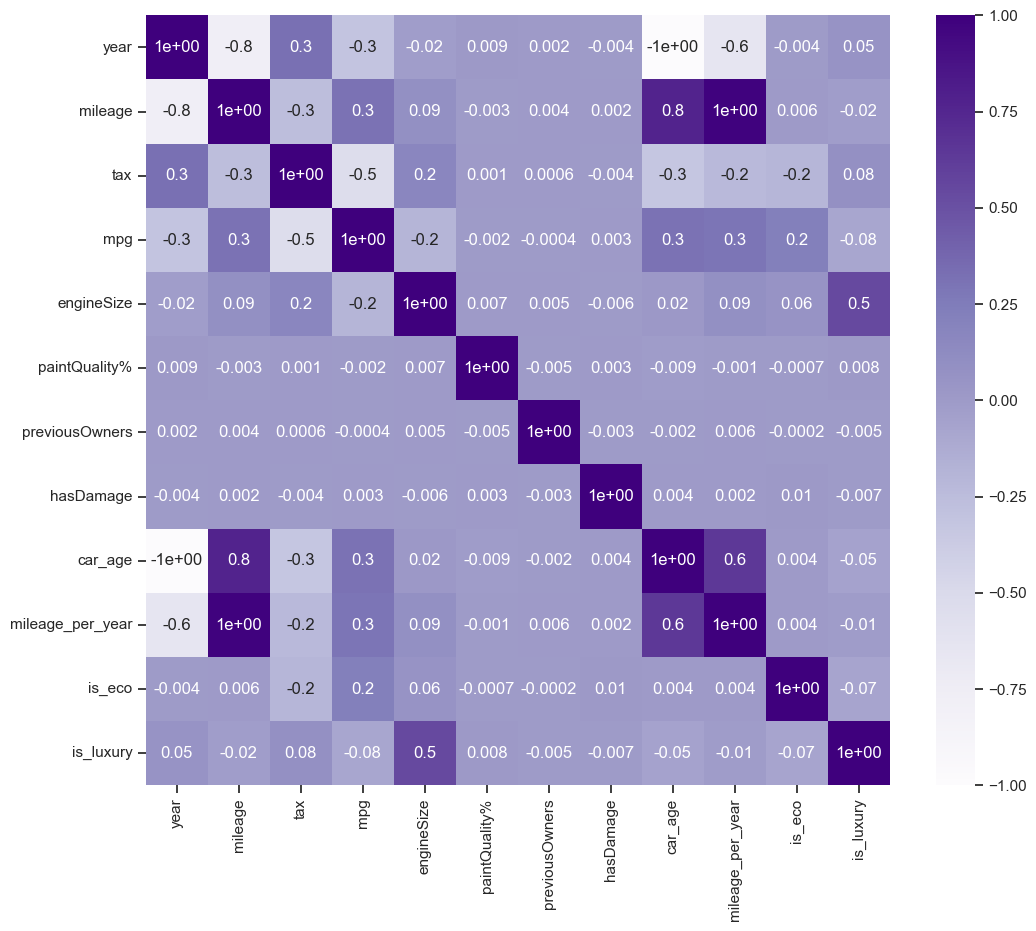

In [ ]:
cor_spearman = X_train_num_scaled.corr(method ='spearman')
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Purples, fmt='.1')
    plt.show()
cor_heatmap(cor_spearman)

We can conclude that:
- We need to use other feature selection techniques to get more insights.
- There are three pairs of variables highly correlated, namely:
    - 'mileage' vs 'car_age' (0.8) <br>
    - 'mileage_per_year' vs 'car_age' (0.7) <br>
    - 'mileage' vs 'year' (0.7) <br>

### **RFE**

Before RFE, we will check if the training and validation instances of the target variable are similiar in statistical metrics. If they behave in close proximity it means the predictions are reasonable.

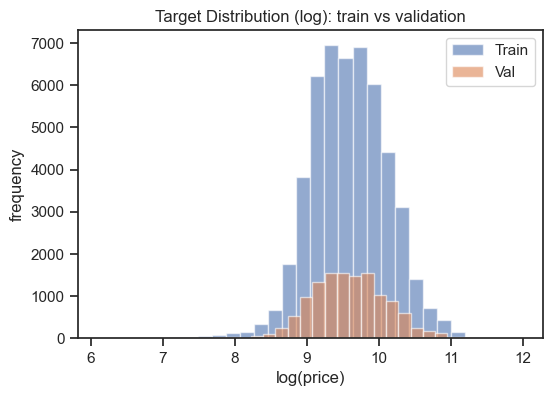

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(np.log(y_train), bins=30, alpha=0.6, label="Train")
plt.hist(np.log(y_val), bins=30, alpha=0.6, label="Val")
plt.legend()
plt.title("Target Distribution (log): train vs validation")
plt.xlabel("log(price)")
plt.ylabel("frequency")
plt.show()

This plot shows the distribution of the logarithm of car prices (`log(price)`) for both the training and validation sets. After applying the logarithmic transformation, the target variable follows an approximately normal distribution, which confirms that the transformation successfully reduced the original right skewness typical of raw price data. Both the train and validation sets exhibit very similar shapes and ranges, suggesting that the data split preserved the underlying price distribution, a good sign for model generalization. The concentration of most values between `log(price)` ~ 8.5 and 10.5 indicates that the majority of cars are within a consistent mid-range price segment, while very cheap or very expensive cars are rare.

Using LinearRegression, created a Linear Regression Classifier instance called `model`

In [ ]:
y_train_log = np.log(y_train)
y_val_log   = np.log(y_val)

In [ ]:
model = LinearRegression()

In [ ]:
def optimal_rfe(X, y, scoring='r2', cv=5, verbose=True):

    model = LinearRegression()
    n_features = X.shape[1]
    scores = []

    if verbose:
        print("Testando diferentes números de features...")

    for n in range(1, n_features + 1):
        rfe = RFE(model, n_features_to_select=n)
        X_rfe = rfe.fit_transform(X, y)
        score = np.mean(cross_val_score(model, X_rfe, y, scoring=scoring, cv=cv))
        scores.append(score)

        if verbose:
            print(f"{n:2d} features -> {scoring}: {score:.4f}")

    best_n = np.argmax(scores) + 1
    best_score = scores[best_n - 1]

    best_rfe = RFE(model, n_features_to_select=best_n)
    best_rfe.fit(X, y)

    feature_ranking = (
        {feature: rank for feature, rank in zip(X.columns, best_rfe.ranking_)}
        if hasattr(X, "columns")
        else None
    )

    if verbose:
        print("\nBest number of features:", best_n)
        print("Best average score:", round(best_score, 4))
        if feature_ranking:
            print("Selected features:", X.columns[best_rfe.support_].tolist())

    return best_rfe, best_n, best_score, feature_ranking

optimal_rfe(X_train_num_scaled, y_train_log, scoring='r2', cv=5, verbose=True)

Testando diferentes números de features...
 1 features -> r2: 0.3660
 2 features -> r2: 0.7096
 3 features -> r2: 0.7565
 4 features -> r2: 0.7870
 5 features -> r2: 0.7870
 6 features -> r2: 0.7882
 7 features -> r2: 0.7934
 8 features -> r2: 0.7964
 9 features -> r2: 0.7979
10 features -> r2: 0.7979
11 features -> r2: 0.7979
12 features -> r2: 0.7979

Best number of features: 9
Best average score: 0.7979
Selected features: ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'car_age', 'mileage_per_year', 'is_eco', 'is_luxury']


(RFE(estimator=LinearRegression(), n_features_to_select=np.int64(9)),
 np.int64(9),
 np.float64(0.7978876379828401),
 {'year': np.int64(1),
  'mileage': np.int64(1),
  'tax': np.int64(1),
  'mpg': np.int64(1),
  'engineSize': np.int64(1),
  'paintQuality%': np.int64(2),
  'previousOwners': np.int64(4),
  'hasDamage': np.int64(3),
  'car_age': np.int64(1),
  'mileage_per_year': np.int64(1),
  'is_eco': np.int64(1),
  'is_luxury': np.int64(1)})

### **LASSO**

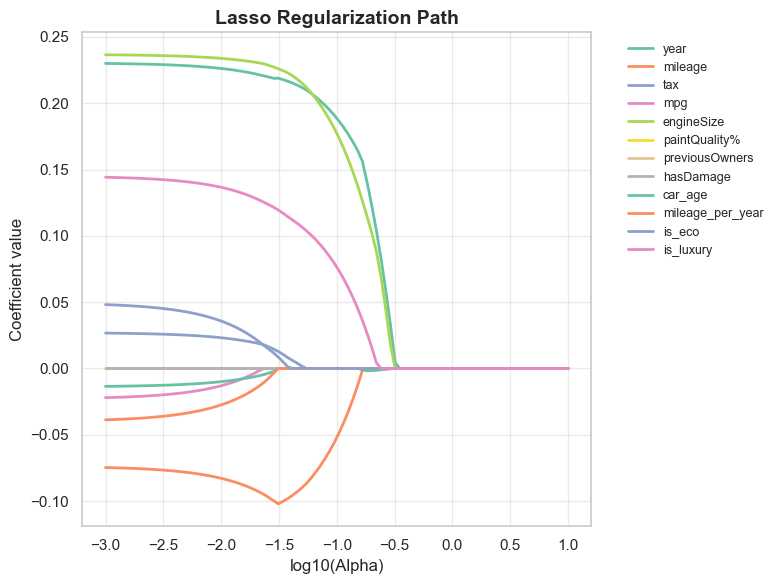

In [ ]:
sns.set_theme(style="whitegrid")

alphas, coefs, _ = lasso_path(X_train_num_scaled, y_train_log, alphas=np.logspace(-3, 1, 100))

palette = sns.color_palette("Set2", n_colors=len(X_train_num_scaled.columns))

plt.figure(figsize=(8,6))
for i, (col, color) in enumerate(zip(X_train_num_scaled.columns, palette)):
    plt.plot(np.log10(alphas), coefs[i], label=col, color=color, linewidth=2)

plt.xlabel('log10(Alpha)', fontsize=12)
plt.ylabel('Coefficient value', fontsize=12)
plt.title('Lasso Regularization Path', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9, frameon=False)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

When α is small, most coefficients are non-zero, meaning that the model includes almost all variables. As α increases, the L1 penalty forces less relevant or redundant variables to shrink toward zero, progressively simplifying the model.

In this case, the first features to be eliminated are those with weaker relationships to the target, such as `paintQuality%`, `previousOwners`, and `hasDamage`.
Conversely, the most persistent variables (`year`, `engineSize`, and `is_luxury`) remain active for a wide range of α values, indicating that they are the strongest predictors of car price.

In [ ]:
reg=LassoCV()

In [ ]:
reg.fit(X_train_num_scaled, y_train_log)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,None
,verbose,False
,n_jobs,None


In [ ]:
coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)
coef

year                0.242259
mileage            -0.074119
tax                 0.026916
mpg                -0.022729
engineSize          0.236737
paintQuality%      -0.000905
previousOwners      0.000020
hasDamage           0.000642
car_age            -0.001821
mileage_per_year   -0.039623
is_eco              0.049069
is_luxury           0.144765
dtype: float64

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 12 variables and eliminated the other 0 variables


In [ ]:
coef.sort_values()

mileage            -0.074119
mileage_per_year   -0.039623
mpg                -0.022729
car_age            -0.001821
paintQuality%      -0.000905
previousOwners      0.000020
hasDamage           0.000642
tax                 0.026916
is_eco              0.049069
is_luxury           0.144765
engineSize          0.236737
year                0.242259
dtype: float64

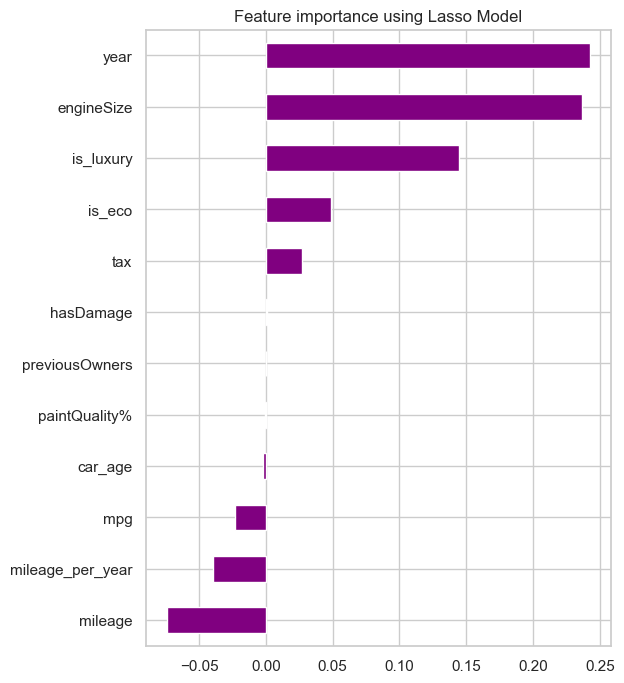

In [ ]:
sns.set_style('whitegrid')
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(6,8))
    imp_coef.plot(kind = "barh", color='purple')
    plt.title("Feature importance using " + name + " Model")
    plt.show()
plot_importance(coef,'Lasso')

According to Lasso, we should not remove any variable as no variable seems insignificant (**coefficient == 0**). `paintQuality%`, `hasDamage` and `previousOwners` seem less important than their remaining predictors.

<hr>

### Numerical Data

| Predictor | Spearman | RFE LR | Lasso | What to do? (One possible way to "solve") | 
| --- | --- | --- |--- |---|
| year | Keep? | Keep | Keep | Discard |
| engineSize | Keep | Keep | Keep | Include in the model |
| is_luxury | Keep | Keep | Keep | Include in the model |
| is_eco | Keep | Keep | Keep | Include in the model |
| tax | Keep | Keep | Keep | Include in the model |
| hasDamage | Keep | Discard | Discard | Discard |
| previousOwners | Keep | Discard | Discard | Discard |
| paintQuality% | Keep | Discard | Discard | Discard |
| car_age | Keep? | Keep | Keep | Include in the model |
| mpg | Keep | Keep | Keep | Include in the model |
| mileage_per_year | Keep? | Discard | Keep | Discard? |
| mileage | Keep? | Keep | Keep | Include in the model |


<hr>


### Categorical Data

| Predictor | Chi-Square | 
| --- | --- | 
| Brand | Keep |  
| model | Keep | 
| transmission | Keep | 
| fuelType | Discard|


<hr>

<h2 style="background-color:#E6A3D6; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
5. Machine Learning Model
</h2>

In [ ]:
X_train = X_train[['Brand', 'model', 'transmission', 'tax', 'mpg','mileage',
                   'engineSize', 'car_age', 'is_eco', 'is_luxury', 'mileage_bin']]

### Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNetCV
X_train = X_train[['Brand', 'transmission', 'tax', 'mpg','mileage',
                   'engineSize', 'car_age', 'is_eco', 'is_luxury']]

numerical_features = ['tax','mileage', 'mpg', 'engineSize','car_age','is_eco', 'is_luxury']

oh_encoded_features = ['Brand', 'transmission']

preprocessor_linear = ColumnTransformer(
    transformers=[
        
        ('num', StandardScaler(), numerical_features),

        
        ('cat_oh', OneHotEncoder(handle_unknown='ignore', sparse_output=False), oh_encoded_features),

        
        # ('cat_target', TargetEncoder(smooth=0.3), target_encoded_features)
    ],
    remainder='passthrough'
)

elasticnet = ElasticNetCV(
   l1_ratio=[.1, .5, .7, .9, .95, .99, 1.0],
    cv=5,
    n_alphas=100,
    random_state=RSEED,
    n_jobs=-1,
    max_iter=10000 # Usar todos os núcleos de CPU
)

model2 = Pipeline([
    ('preprocessor', preprocessor_linear),
    ('elasticnet', elasticnet)])

model2.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('elasticnet', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat_oh', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
y_pred_train =model2.predict(X_train)
y_pred_val = model2.predict(X_val)

print('Validation set:')
print("R²:", r2_score(y_val, y_pred_val))
print("MAE:", mean_absolute_error(y_val, y_pred_val))
print("RMSE:", root_mean_squared_error(y_val, y_pred_val))
print('MedAE:',median_absolute_error(y_val, y_pred_val))
print("MAPE:", mean_absolute_percentage_error(y_val, y_pred_val))

print('\nTraining set:')
print("R²:", r2_score(y_train, y_pred_train))
print("MAE:", mean_absolute_error(y_train, y_pred_train))
print("RMSE:", root_mean_squared_error(y_train, y_pred_train))
print('MedAE:',median_absolute_error(y_train, y_pred_train))
print("MAPE:", mean_absolute_percentage_error(y_train, y_pred_train))

Validation set:
R²: 0.6913067322876185
MAE: 3593.1293849016847
RMSE: 5267.399613840804
MedAE: 2594.9536137773684
MAPE: 0.24993736215709553

Training set:
R²: 0.7412131317541717
MAE: 3190.236678958355
RMSE: 5026.56736641376
MedAE: 2226.728875760474
MAPE: 0.23716755470576573


### SVM

In [ ]:

numerical_features = ['tax', 'mpg', 'engineSize','car_age','is_eco', 'is_luxury']

oh_encoded_features = ['Brand', 'transmission', 'mileage_bin']
target_encoded_features = ['model']

preprocessor_new = ColumnTransformer(
    transformers=[
        
        ('num', StandardScaler(), numerical_features),

        
        ('cat_oh', OneHotEncoder(handle_unknown='ignore', sparse_output=False), oh_encoded_features),

        
        ('cat_target', TargetEncoder(smooth=0.3), target_encoded_features)
    ],
    remainder='passthrough'
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor_new),
    ('regressor', SVR(kernel='rbf', C=5, gamma=0.05)) 
])

model.fit(X_train, y_train_log)


ValueError: A given column is not a column of the dataframe

In [ ]:

y_pred_train = np.exp(model.predict(X_train))
y_pred_val = np.exp(model.predict(X_val))

print('Validation set:')
print("R²:", r2_score(y_val, y_pred_val))
print("MAE:", mean_absolute_error(y_val, y_pred_val))
print("RMSE:", root_mean_squared_error(y_val, y_pred_val))
print('MedAE:',median_absolute_error(y_val, y_pred_val))
print("MAPE:", mean_absolute_percentage_error(y_val, y_pred_val))

print('\nTraining set:')
print("R²:", r2_score(y_train, y_pred_train))
print("MAE:", mean_absolute_error(y_train, y_pred_train))
print("RMSE:", root_mean_squared_error(y_train, y_pred_train))
print('MedAE:',median_absolute_error(y_train, y_pred_train))
print("MAPE:", mean_absolute_percentage_error(y_train, y_pred_train))



Validation set:
R²: 0.8246430035547536
MAE: 2290.4440406650597
RMSE: 3965.952013767317
MedAE: 1381.4123772546664
MAPE: 0.14343383595909687

Training set:
R²: 0.9188627780127874
MAE: 1697.2999085561926
RMSE: 2814.530014855564
MedAE: 1097.1943739618655
MAPE: 0.1025457471652334


In [ ]:
lasso = LassoCV(
    alphas=np.logspace(-4, 1, 50),
    cv=5,
    random_state=42,
    n_jobs=-1
)
model_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor_linear),
    ('lasso', lasso)
])
model2.fit(X_train, y_train_log)

,steps,"[('preprocessor', ...), ('elasticnet', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat_oh', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
y_pred_train = np.exp(model2.predict(X_train))
y_pred_val = np.exp(model2.predict(X_val))

print('Validation set:')
print("R²:", r2_score(y_val, y_pred_val))
print("MAE:", mean_absolute_error(y_val, y_pred_val))
print("RMSE:", root_mean_squared_error(y_val, y_pred_val))
print('MedAE:',median_absolute_error(y_val, y_pred_val))
print("MAPE:", mean_absolute_percentage_error(y_val, y_pred_val))

print('\nTraining set:')
print("R²:", r2_score(y_train, y_pred_train))
print("MAE:", mean_absolute_error(y_train, y_pred_train))
print("RMSE:", root_mean_squared_error(y_train, y_pred_train))
print('MedAE:',median_absolute_error(y_train, y_pred_train))
print("MAPE:", mean_absolute_percentage_error(y_train, y_pred_train))

Validation set:
R²: -8.210253278947007e+25
MAE: 1.1770905753170152e+16
RMSE: 8.581519298986965e+16
MedAE: 1662.4261917061995
MAPE: 788807908705.5079

Training set:
R²: 0.8560397990404047
MAE: 2188.9225991352064
RMSE: 3749.013804198811
MedAE: 1375.143576159695
MAPE: 0.1320017681979903


### Desision tree


In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(
    criterion='squared_error', 
    max_depth=5,                
    random_state=42
)

model3 = Pipeline([
    ('preprocess', preprocessor_new),
    ('tree', tree)
])

model3.fit(X_train, y_train_log)

,steps,"[('preprocess', ...), ('tree', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat_oh', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
y_pred_train = np.exp(model3.predict(X_train))
y_pred_val = np.exp(model3.predict(X_val))

print('Validation set:')
print("R²:", r2_score(y_val, y_pred_val))
print("MAE:", mean_absolute_error(y_val, y_pred_val))
print("RMSE:", root_mean_squared_error(y_val, y_pred_val))
print('MedAE:',median_absolute_error(y_val, y_pred_val))
print("MAPE:", mean_absolute_percentage_error(y_val, y_pred_val))

print('\nTraining set:')
print("R²:", r2_score(y_train, y_pred_train))
print("MAE:", mean_absolute_error(y_train, y_pred_train))
print("RMSE:", root_mean_squared_error(y_train, y_pred_train))
print('MedAE:',median_absolute_error(y_train, y_pred_train))
print("MAPE:", mean_absolute_percentage_error(y_train, y_pred_train))

Validation set:
R²: 0.6352594933755148
MAE: 3253.1561575943088
RMSE: 5719.761294426242
MedAE: 1962.4654092315104
MAPE: 0.19050682720003032

Training set:
R²: 0.8021183173736999
MAE: 2822.1330399604926
RMSE: 4395.40213422284
MedAE: 1863.1552301415177
MAPE: 0.17358055906280326
